In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [2]:
chart_size= [10,10]

In [3]:
address = 'C:\DADOS\ANDERSON\PROJ_VULCAN\S16\Arq_Vulcan\\'

In [4]:
proj="S16"

## LISTAS

In [5]:
cover         = ['CE', 'CQ']

fresh_clean   = ['HC', 'HF', 'JP']
str_ore       = ['HC', 'HF']
ore_rocks     = ['CE', 'HC', 'HF', 'HMN']
basin_rocks   = ['JP']
mineralized   = ['CE', 'HC', 'HF', 'HMN', 'JP']
waste         = ['CQ', 'MD', 'MS', 'MSD', 'BR']

model_rocks = ['CE', 'HC', 'HF', 'HMN',  'JP', 'CQ', 'MD', 'MSD', 'MS', 'BR' ]

teores_gl     = ['FEGL', 'SIGL', 'PGL', 'ALGL', 'MNGL', 'PFGL']
faixas        = ['g1', 'g2', 'g3']
param_event   = ['FEGL', 'SIGL', 'PGL', 'ALGL', 'MNGL', 'PFGL' 'G1', 'G2', 'G3']

#ATUALIZAR DEPOIS DE LER
not_countable = ['FURO','NA','DE','ATE','CLV','CLM','FLX_AN','FLX_AN_OR','DA_ANA','DA_SAM','d_agru','tipo_am','global','mass_t','status']

gran_batch = ['G1', 'G2', 'G3']

set_g1 = ['G1','FE1', 'SI1', 'P1', 'AL1', 'MN1', 'PF1']
set_g2 = ['G2','FE2', 'SI2', 'P2', 'AL2','MN2', 'PF2']
set_g3 = ['G3','FE3', 'SI3', 'P3', 'AL3', 'MN3','PF3']

v_krig = [ 'FEGL', 'SIGL', 'PGL', 'ALGL', 'MNGL', 'PFGL']

litocolor=dict(AG= "#FFEEBB",AT= "#777777",CE= "#00AA00",CH= "#FFFF00",FIC= "#FFFF00", CQ= "#77FFBB", \
               FMN= "#7766DD",IN= "#CC8800", HC= "#EE0000",HF= "#EE00DD",HMN= "#995555",JP= "#004488", \
               LT= "#99BB99",MD= "#CC8800",MS= "#99BB99", FP= "#BB133E",MSD= "#DDCC77",QT= "#776655", \
               SO= "#336611",SR= "#FFFFFF",XI= "#CC8800", BR= "#BB133E", VQ= "#777777", QZC = "#776655")


valecolor= dict(VERDE='#007E7A',LARANJA='#ECB11F',CINZA='#6F7070',BRANCO='#FFFFFF', \
                LARANJA2='#E37222',VERMELHO='#BB133E',AZUL='#3D7EDB',AZUL2='#00B0CA', \
                VERDE2='#69BE28',AMARELO='#DFDF00')

rec_color = dict(MEDIDO='#007E7A', INDICADO='#3D7EDB', INFERIDO='#E37222', N='#6F7070')


## LOAD DATA

In [6]:
fso = pd.read_csv(address + 's16flp_fso_assay.csv', low_memory=False, na_values='-99', encoding="latin1")
fso.rename(columns=str.upper, inplace=True)

In [7]:
cac=  pd.read_csv(address + 's16flp_cac_entry.csv', low_memory=False, na_values='-99', encoding="latin1")
cac.rename(columns=str.upper, inplace=True)

In [8]:
# importing only blocks with assigned fegl

In [9]:
bmf = pd.read_csv(address + 'bmf_eda.csv', low_memory=False, na_values='-99', encoding="latin1", skiprows=[1,2,3,4])
bmf.rename(columns=str.upper, inplace=True)
bmf['LITO']=bmf['LITO'].str.upper()
bmf['INVENTORY']=bmf['INVENTORY'].str.upper()
bmf['RECURSO']=bmf['RECURSO'].str.upper()

In [10]:
# importing all blocks

In [11]:
#bmf_full = pd.read_csv(address + 's16_full.csv', low_memory=False, na_values='-99', encoding="latin1", skiprows=[1,2,3,4])
#bmf_full.rename(columns=str.upper, inplace=True)
#bmf_full['LITO']=bmf_full['LITO'].str.upper()
#bmf_full['RECURSO']=bmf_full['RECURSO'].str.upper()

In [12]:
bmf.shape

(1045183, 49)

#### Making sure tonnage is always defined

In [13]:
i = bmf.TONELADA.isna()
bmf.loc[i,:]

,CENTROID_X,CENTROID_Y,CENTROID_Z,DIM_X,DIM_Y,DIM_Z,VOLUME,TOPO,CAVA,LITO_LF,LITO_LP,LITO,MINE,DENS_N,AUX,AUX_TP,IBR,ICE,ICQ,ISO,IHF,IHC,IHMN,IJP,IIN,IFIC,IFP,IND,IR,IK,VAR_IK,RECURSO,INVENTORY,NHOLES,NCOMP,FEGL,SIGL,PGL,ALGL,MNGL,PFGL,DILA,ERO,REC_MALHA,FQGL,TONELADA,PRODUCT,LITO_3D,AUX_CLASS


In [14]:
i = bmf.DENS_N.isna()
bmf.loc[i,:]

,CENTROID_X,CENTROID_Y,CENTROID_Z,DIM_X,DIM_Y,DIM_Z,VOLUME,TOPO,CAVA,LITO_LF,LITO_LP,LITO,MINE,DENS_N,AUX,AUX_TP,IBR,ICE,ICQ,ISO,IHF,IHC,IHMN,IJP,IIN,IFIC,IFP,IND,IR,IK,VAR_IK,RECURSO,INVENTORY,NHOLES,NCOMP,FEGL,SIGL,PGL,ALGL,MNGL,PFGL,DILA,ERO,REC_MALHA,FQGL,TONELADA,PRODUCT,LITO_3D,AUX_CLASS


In [15]:
# good stuff!!!

In [16]:
bmf.groupby('LITO').TONELADA.describe().style.format('{:,.3f}')

,count,mean,std,min,25%,50%,75%,max
LITO,,,,,,,,
BR,"1,163.000","27,187.500",0.000,"27,187.500","27,187.500","27,187.500","27,187.500","27,187.500"
CE,"10,132.000","28,031.250",0.000,"28,031.250","28,031.250","28,031.250","28,031.250","28,031.250"
CQ,"29,118.000","22,312.502",0.000,"22,312.502","22,312.502","22,312.502","22,312.502","22,312.502"
FIC,"362,482.000","26,156.250",0.000,"26,156.250","26,156.250","26,156.250","26,156.250","26,156.250"
FP,"436,724.000","26,156.250",0.000,"26,156.250","26,156.250","26,156.250","26,156.250","26,156.250"
HC,3.000,"31,406.250",0.000,"31,406.250","31,406.250","31,406.250","31,406.250","31,406.250"
HF,"5,045.000","30,000.000",0.000,"30,000.000","30,000.000","30,000.000","30,000.000","30,000.000"
IN,49.000,"26,156.250",0.000,"26,156.250","26,156.250","26,156.250","26,156.250","26,156.250"
JP,"58,021.000","31,312.500",0.000,"31,312.500","31,312.500","31,312.500","31,312.500","31,312.500"


In [17]:
# but not mined yet!!!

In [18]:
bmf.groupby('LITO').MINE.describe().style.format('{:,.3f}')

,count,mean,std,min,25%,50%,75%,max
LITO,,,,,,,,
BR,"1,163.000",99.952,0.758,82.038,100.000,100.000,100.000,100.000
CE,"10,132.000",21.726,35.131,0.000,0.000,0.000,36.004,100.000
CQ,"29,118.000",14.033,29.010,0.000,0.000,0.000,4.909,100.000
FIC,"362,482.000",99.994,0.237,71.698,100.000,100.000,100.000,100.000
FP,"436,724.000",99.984,0.488,55.283,100.000,100.000,100.000,100.000
HC,3.000,100.000,0.000,100.000,100.000,100.000,100.000,100.000
HF,"5,045.000",99.965,0.751,73.560,100.000,100.000,100.000,100.000
IN,49.000,100.000,0.000,100.000,100.000,100.000,100.000,100.000
JP,"58,021.000",99.989,0.284,67.272,100.000,100.000,100.000,100.000


In [19]:
# mine applied from 0 to 100%

#### Update Mined Tonnage

In [20]:
i = bmf.VOLUME.notna()
bmf['TONELADA'] = bmf.VOLUME * bmf.DENS_N * (bmf.MINE/100)


In [21]:
# checking again

In [22]:
bmf.groupby('LITO').TONELADA.describe().style.format('{:,.3f}')

,count,mean,std,min,25%,50%,75%,max
LITO,,,,,,,,
BR,"1,163.000","27,174.368",206.154,"22,304.127","27,187.500","27,187.500","27,187.500","27,187.500"
CE,"10,132.000","6,090.194","9,847.561",0.000,0.000,0.000,"10,092.388","28,031.250"
CQ,"29,118.000","3,131.089","6,472.953",0.000,0.000,0.000,"1,095.355","22,312.500"
FIC,"362,482.000","26,154.747",61.953,"18,753.637","26,156.250","26,156.250","26,156.250","26,156.250"
FP,"436,724.000","26,152.029",127.655,"14,459.833","26,156.250","26,156.250","26,156.250","26,156.250"
HC,3.000,"31,406.250",0.000,"31,406.250","31,406.250","31,406.250","31,406.250","31,406.250"
HF,"5,045.000","29,989.559",225.165,"22,068.059","30,000.000","30,000.000","30,000.000","30,000.000"
IN,49.000,"26,156.250",0.000,"26,156.250","26,156.250","26,156.250","26,156.250","26,156.250"
JP,"58,021.000","31,309.088",89.039,"21,064.532","31,312.500","31,312.500","31,312.500","31,312.500"


In [23]:
#fixed! carry on!

#### Block Model Dataframe Optimization

In [24]:
# getting our datastream general information

In [25]:
bmf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045183 entries, 0 to 1045182
Data columns (total 49 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   CENTROID_X  1045183 non-null  float64
 1   CENTROID_Y  1045183 non-null  float64
 2   CENTROID_Z  1045183 non-null  float64
 3   DIM_X       1045183 non-null  float64
 4   DIM_Y       1045183 non-null  float64
 5   DIM_Z       1045183 non-null  float64
 6   VOLUME      1045183 non-null  float64
 7   TOPO        1045183 non-null  int64  
 8   CAVA        1045183 non-null  int64  
 9   LITO_LF     1045183 non-null  object 
 10  LITO_LP     1045183 non-null  object 
 11  LITO        1045183 non-null  object 
 12  MINE        1045183 non-null  float64
 13  DENS_N      1045183 non-null  float64
 14  AUX         0 non-null        float64
 15  AUX_TP      167851 non-null   float64
 16  IBR         1045183 non-null  float64
 17  ICE         1045183 non-null  float64
 18  ICQ         1045183 no

In [26]:
bmf.memory_usage(deep=True)

Index              128
CENTROID_X     8361464
CENTROID_Y     8361464
CENTROID_Z     8361464
DIM_X          8361464
DIM_Y          8361464
DIM_Z          8361464
VOLUME         8361464
TOPO           8361464
CAVA           8361464
LITO_LF       62028178
LITO_LP       64801346
LITO          62028279
MINE           8361464
DENS_N         8361464
AUX            8361464
AUX_TP         8361464
IBR            8361464
ICE            8361464
ICQ            8361464
ISO            8361464
IHF            8361464
IHC            8361464
IHMN           8361464
IJP            8361464
IIN            8361464
IFIC           8361464
IFP            8361464
IND            8361464
IR             8361464
IK             8361464
VAR_IK         8361464
RECURSO       60705990
INVENTORY     60721488
NHOLES         8361464
NCOMP          8361464
FEGL           8361464
SIGL           8361464
PGL            8361464
ALGL           8361464
MNGL           8361464
PFGL           8361464
DILA           8361464
ERO        

In [27]:
bmf.memory_usage(deep=True).sum()

844755506

In [28]:
# 885 MB alocated! we reduce memory consumption using category data type... lets check some object fields...

In [29]:
bmf.LITO_LF.unique()

array(['fp', 'jp', 'fic', 'in', 'so', 'br', 'hf', 'hmn', 'cq', 'ce', 'hc'],
      dtype=object)

In [30]:
bmf.LITO_LP.unique()

array(['vazio'], dtype=object)

In [31]:
bmf.LITO_3D.unique()

array(['fp', 'jp', 'fic', 'in', 'so', 'br', 'hf', 'cq', 'ce', 'hc'],
      dtype=object)

In [32]:
bmf.LITO.unique()

array(['FP', 'JP', 'FIC', 'IN', 'SO', 'BR', 'HF', 'CQ', 'CE', 'HC'],
      dtype=object)

In [33]:
bmf.RECURSO.unique()

array(['N', 'INFERIDO', 'INDICADO', 'MEDIDO'], dtype=object)

In [34]:
# this occurs cause some values are written in millions of registers

In [35]:
# lets fix that

In [36]:
#bmf_full['RECURSO'] = bmf_full.RECURSO.astype('category')

In [37]:
bmf['LITO'] = bmf.LITO.astype('category')

In [38]:
bmf['LITO_LF'] = bmf.LITO_LF.astype('category')

In [39]:
bmf.memory_usage(deep=True).sum()

722791257

In [40]:
# it decreased 100 Mb
# but there's another issue to solve:

In [41]:
#bmf.RECURSO

In [42]:
bmf.RECURSO.head()

0    N
1    N
2    N
3    N
4    N
Name: RECURSO, dtype: object

In [43]:
# as you can notice, these categories are sorted alphabetically, as it is, all the processes from here are going 
# to put their results begining from indicated, infered, measured and so on...

In [44]:
from pandas.api.types import CategoricalDtype
rec_cat = CategoricalDtype(['N', 'INFERIDO', 'INDICADO', 'MEDIDO'], ordered=True)

In [45]:
bmf['RECURSO'] = bmf.RECURSO.astype(rec_cat)
bmf['INVENTORY'] = bmf.INVENTORY.astype(rec_cat)

In [46]:
# lets take a look:

In [47]:
bmf.RECURSO.head(4)

0    N
1    N
2    N
3    N
Name: RECURSO, dtype: category
Categories (4, object): ['N' < 'INFERIDO' < 'INDICADO' < 'MEDIDO']

In [48]:
bmf.describe()

,CENTROID_X,CENTROID_Y,CENTROID_Z,DIM_X,DIM_Y,DIM_Z,VOLUME,TOPO,CAVA,MINE,DENS_N,AUX,AUX_TP,IBR,ICE,ICQ,ISO,IHF,IHC,IHMN,IJP,IIN,IFIC,IFP,IND,IR,IK,VAR_IK,NHOLES,NCOMP,FEGL,SIGL,PGL,ALGL,MNGL,PFGL,DILA,ERO,FQGL,TONELADA,AUX_CLASS
count,1.045183e+06,1.045183e+06,1.045183e+06,1045183.0,1045183.0,1045183.0,1045183.0,1045183.0,1045183.0,1.045183e+06,1.045183e+06,0.0,167851.0,1.045183e+06,1.045183e+06,1.045183e+06,1.045183e+06,1.045183e+06,1.045183e+06,1.045183e+06,1.045183e+06,1.045183e+06,1.045183e+06,1.045183e+06,167851.0,40891.000000,40891.000000,40891.000000,1.045183e+06,1.045183e+06,12650.000000,12650.000000,12650.000000,12650.000000,12650.000000,12650.000000,167851.000000,167851.0,14864.000000,1.045183e+06,41556.0
mean,5.786946e+05,9.288605e+06,2.941508e+02,25.0,25.0,15.0,9375.0,1.0,0.0,8.611466e+01,2.757273e+00,NaN,1.0,1.110406e-03,9.725714e-03,2.973823e-02,1.346087e-01,4.838047e-03,6.616531e-06,3.482666e-06,5.554146e-02,5.802609e-05,3.466247e-01,4.177446e-01,1.0,1.370971,0.168059,1.034686,2.255739e-01,9.024257e-02,55.068596,18.445680,0.068053,1.050854,0.081710,1.452198,0.501832,0.0,99.899680,2.270747e+04,1.0
std,1.900576e+03,1.112839e+03,1.282983e+02,0.0,0.0,0.0,0.0,0.0,0.0,3.341544e+01,2.110173e-01,NaN,0.0,3.102883e-02,9.391479e-02,1.622228e-01,3.299668e-01,6.615293e-02,1.545230e-03,8.619620e-04,2.214147e-01,5.754249e-03,4.705354e-01,4.875358e-01,0.0,0.356639,0.310072,0.384588,1.325751e+00,5.425535e-01,11.996083,18.689734,0.122025,1.013413,0.104016,1.789990,0.910293,0.0,0.518033,9.003208e+03,0.0
min,5.755125e+05,9.286612e+06,1.075000e+02,25.0,25.0,15.0,9375.0,1.0,0.0,0.000000e+00,2.380000e+00,NaN,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.067816,-0.057495,0.035842,0.000000e+00,0.000000e+00,34.452080,0.161346,0.005000,0.100000,0.004425,0.001000,0.000000,0.0,98.107605,0.000000e+00,1.0
25%,5.771125e+05,9.287712e+06,1.975000e+02,25.0,25.0,15.0,9375.0,1.0,0.0,1.000000e+02,2.790000e+00,NaN,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,1.151797,0.000000,0.771656,0.000000e+00,0.000000e+00,42.895950,0.726634,0.010000,0.357274,0.026590,0.338319,0.000000,0.0,99.657730,2.615625e+04,1.0
50%,5.785375e+05,9.288562e+06,2.875000e+02,25.0,25.0,15.0,9375.0,1.0,0.0,1.000000e+02,2.790000e+00,NaN,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,1.408638,0.000000,1.060908,0.000000e+00,0.000000e+00,60.622982,8.222802,0.017600,0.680167,0.048100,0.602277,0.000000,0.0,99.841805,2.615625e+04,1.0
75%,5.802875e+05,9.289538e+06,3.775000e+02,25.0,25.0,15.0,9375.0,1.0,0.0,1.000000e+02,2.790000e+00,NaN,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.0,1.661903,0.195177,1.359520,0.000000e+00,0.000000e+00,66.674370,36.961765,0.032200,1.382400,0.071278,2.087591,1.000000,0.0,100.222412,2.615625e+04,1.0
max,5.822875e+05,9.290588e+06,7.525000e+02,25.0,25.0,15.0,9375.0,1.0,0.0,1.000000e+02,3.350000e+00,NaN,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.203260e-01,4.615640e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.961026,1.032448,1.686898,1.600000e+01,1.000000e+01,69.726151,50.733898,0.679073,5.042549,0.642028,7.311543,3.000000,0.0,100.999115,3.140625e+04,1.0


In [49]:
# now it's ready!!! doing the same with REC_MALHA quickly

In [50]:
bmf.head(4)

,CENTROID_X,CENTROID_Y,CENTROID_Z,DIM_X,DIM_Y,DIM_Z,VOLUME,TOPO,CAVA,LITO_LF,LITO_LP,LITO,MINE,DENS_N,AUX,AUX_TP,IBR,ICE,ICQ,ISO,IHF,IHC,IHMN,IJP,IIN,IFIC,IFP,IND,IR,IK,VAR_IK,RECURSO,INVENTORY,NHOLES,NCOMP,FEGL,SIGL,PGL,ALGL,MNGL,PFGL,DILA,ERO,REC_MALHA,FQGL,TONELADA,PRODUCT,LITO_3D,AUX_CLASS
0,575512.5,9286612.5,107.5,25.0,25.0,15.0,9375.0,1,0,fp,vazio,FP,100.0,2.79,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,N,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n,NaN,26156.25,n,fp,NaN
1,575512.5,9286612.5,122.5,25.0,25.0,15.0,9375.0,1,0,fp,vazio,FP,100.0,2.79,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,N,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n,NaN,26156.25,n,fp,NaN
2,575537.5,9286612.5,122.5,25.0,25.0,15.0,9375.0,1,0,fp,vazio,FP,100.0,2.79,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,N,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n,NaN,26156.25,n,fp,NaN
3,575512.5,9286637.5,122.5,25.0,25.0,15.0,9375.0,1,0,fp,vazio,FP,100.0,2.79,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,N,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n,NaN,26156.25,n,fp,NaN


### COMPARING INVENTORY AND RESOURCES

#### INVENTORY

In [51]:
# ACQUIRED UTILITY
i = bmf.LITO.isin(['CE', 'HC', 'HF', 'HMN', 'JP'])
inv_classified = bmf.loc[i, :].copy()


inventory=pd.DataFrame(inv_classified.groupby(['INVENTORY']).TONELADA.sum())
inventory.style.format('{:,.0f}')



,TONELADA
INVENTORY,
N,"1,630,785,369"
INFERIDO,"308,016,196"
INDICADO,"48,922,791"
MEDIDO,"41,957,607"


#### RECURSO

In [52]:
i = bmf.LITO.isin(['CE', 'HC', 'HF', 'HMN', 'JP'])
rec_classified = bmf.loc[i, :].copy()


recurso=pd.DataFrame(rec_classified.groupby(['RECURSO']).TONELADA.sum())
recurso.style.format('{:,.0f}')

,TONELADA
RECURSO,
N,"1,699,928,022"
INFERIDO,"239,686,356"
INDICADO,"48,109,978"
MEDIDO,"41,957,607"


In [53]:
# ok!!! the difference between inventory and resource was expected, once some blocks were downgraded to 'N' (~70Mt)

In [66]:
import plotly.graph_objects as go

fig = go.Figure(go.Waterfall(
    name = "20", orientation = "v",
    measure = ["relative", "relative", "relative", "relative", "total", "total"],
    x = ["All Blocks", "Measured", "Indicated", "Infered", "Potential: All Rocks", 'Potential: JP'],
    textposition = "outside",
   
    y = [2029681963, -239686356, -48109978, -41957607, 1699928022, 1627121533],
    text = ['2 029 681 963', '-239 686 356', '-48 109 978', '-41 957 607', '1 699 928 022', '1 627 121 533'],

    connector = {"line":{"color":"rgb(63, 63, 63)"}},
))

fig.update_layout(
        title = "S16 RESOURCES WATERFALLPLOT",
        showlegend = True
)

fig.show()

In [107]:
fig = go.Figure(go.Waterfall(
    name = "20", orientation = "v",
    measure = ["relative", "relative", "relative", "relative", "total", "reltive"],
    x = ["All Blocks", "Measured", "Indicated", "Infered", "Potential: [CE, HF]", "Potential: [CE]"],
    textposition = "outside",
   
    y = [213097391, -38826357, -35741541, -65723005, 72806488, -29353911],
    text = ['213 097 391', '-38 826 357', '-35 741 541', '-65 723 005', '72 806 488',['HF:29 353 911','REMAINING: 43 452 577']],

    connector = {"line":{"color":"rgb(63, 63, 63)"}},
))

fig.update_layout(
        title = "S16 RESOURCES WATERFALLPLOT EXCLUDING JP",
        showlegend = True
)

fig.show()

#### BREAKING BY LITO AND EXCLUDING JP

In [76]:
# ACQUIRED UTILITY
seli = (bmf.RECURSO >= 'N') & bmf.LITO.isin(['CE', 'HC', 'HF', 'HMN'])
rec_classified = bmf.loc[seli, :].copy() 

totais_rec=pd.DataFrame(rec_classified.groupby(['INVENTORY', 'LITO']).TONELADA.sum())
totais_rec.style.format('{:,.0f}')

totais_rec.to_csv('totais_rec.csv')


In [85]:
# ACQUIRED UTILITY
sel = (bmf.RECURSO >= 'N') & bmf.LITO.isin(['CE', 'HC', 'HF', 'HMN'])
classified = bmf.loc[sel, :].copy()

m = (bmf.RECURSO == 'MEDIDO') & bmf.LITO.isin(['CE', 'HC', 'HF', 'HMN', 'JP'])
n = (bmf.RECURSO == 'INDICADO') & bmf.LITO.isin(['CE', 'HC', 'HF', 'HMN', 'JP'])
o = (bmf.RECURSO == 'INFERIDO') & bmf.LITO.isin(['CE', 'HC', 'HF', 'HMN', 'JP'])

med = bmf.loc[m, :].copy()
ind = bmf.loc[n, :].copy()
inf = bmf.loc[o, :].copy()


In [86]:
totais=pd.DataFrame(classified.groupby(['RECURSO', 'LITO']).TONELADA.sum())
totais.style.format('{:,.0f}')

In [87]:
totais.index.names

FrozenList(['RECURSO', 'LITO'])

In [92]:
totais.unstack().style.format('{:,.0f}')

In [93]:
totais.to_csv('totais.csv')

PermissionError: [Errno 13] Permission denied: 'totais.csv'

In [94]:
totais.pivot_table(values='TONELADA', index='RECURSO').style.format('{:,.0f}')

,TONELADA
RECURSO,
N,"7,280,649"
INFERIDO,"6,572,301"
INDICADO,"3,574,154"
MEDIDO,"3,882,636"


In [91]:
totais_2 = totais.loc[(['MEDIDO', 'INDICADO', 'INFERIDO'],['CE','HC','HF','HMN', 'JP']),:]
totais_2.style.format('{:,.0f}')

In [84]:
bm_origin =  [575500.0, 9286600.0, 100.0]
plan = 600

##### POTENCIAIS FF

In [282]:
i = (bmf.LITO.isin(['CE', 'HC', 'HF', 'HMN', 'JP'])) & (bmf.RECURSO == 'N')
pot = bmf.loc[i, :].copy()


recurso=pd.DataFrame(pot.groupby(['RECURSO','LITO']).TONELADA.sum())
recurso.style.format('{:,.0f}')

In [297]:
recurso.to_csv('potenciais.csv')

In [295]:
KNOWN_RANGES=classified.groupby('LITO').FEGL.describe()
KNOWN_RANGES

,count,mean,std,min,25%,50%,75%,max
LITO,,,,,,,,
BR,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CE,2531.0,63.820584,2.066399,59.939594,62.070702,63.910133,65.320900,67.000999
CQ,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FIC,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FP,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HC,3.0,65.940224,0.420895,65.454216,65.818722,66.183228,66.183228,66.183228
HF,4065.0,67.033654,2.155771,60.130501,66.331909,67.817711,68.469208,69.726151
IN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JP,6051.0,43.364439,5.537075,34.452080,39.316505,42.365559,47.293598,56.433865


In [296]:
KNOWN_RANGES['INTERQUANTILE'] = KNOWN_RANGES['75%'] - KNOWN_RANGES['25%']
KNOWN_RANGES['FLOOR'] = KNOWN_RANGES['25%'] - 1.5 * KNOWN_RANGES['INTERQUANTILE']
KNOWN_RANGES['CEIL'] = KNOWN_RANGES['75%'] + 1.5 * KNOWN_RANGES['INTERQUANTILE']
KNOWN_RANGES['EXTREMEFLOOR'] = KNOWN_RANGES['50%'] - 3 * KNOWN_RANGES['std']
KNOWN_RANGES['EXTREMECEIL'] = KNOWN_RANGES['50%'] + 3 * KNOWN_RANGES['std']
KNOWN_RANGES

,count,mean,std,min,25%,50%,75%,max,INTERQUANTILE,FLOOR,CEIL,EXTREMEFLOOR,EXTREMECEIL
LITO,,,,,,,,,,,,,
BR,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CE,2531.0,63.820584,2.066399,59.939594,62.070702,63.910133,65.320900,67.000999,3.250198,57.195405,70.196197,57.710936,70.109330
CQ,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FIC,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FP,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HC,3.0,65.940224,0.420895,65.454216,65.818722,66.183228,66.183228,66.183228,0.364506,65.271963,66.729987,64.920542,67.445914
HF,4065.0,67.033654,2.155771,60.130501,66.331909,67.817711,68.469208,69.726151,2.137299,63.125960,71.675156,61.350397,74.285025
IN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JP,6051.0,43.364439,5.537075,34.452080,39.316505,42.365559,47.293598,56.433865,7.977093,27.350865,59.259238,25.754333,58.976785


#### Calculating index according corridor

In [63]:
import math

In [64]:
corridor = 100

In [65]:
bmf['REL_X'] = (bmf['CENTROID_X'] - bm_origin[0])/corridor
bmf['REL_Y'] = (bmf['CENTROID_Y'] - bm_origin[1])/corridor  

In [66]:
bmf['INDEX_X'] = bmf['REL_X'].apply(np.ceil)
bmf['INDEX_Y'] = bmf['REL_Y'].apply(np.ceil)

In [67]:
bmf.head()

,CENTROID_X,CENTROID_Y,CENTROID_Z,DIM_X,DIM_Y,DIM_Z,VOLUME,TOPO,CAVA,LITO_LF,LITO_LP,LITO,MINE,DENS_N,AUX,AUX_TP,IBR,ICE,ICQ,ISO,IHF,IHC,IHMN,IJP,IIN,IFIC,IFP,IND,IR,IK,VAR_IK,RECURSO,INVENTORY,NHOLES,NCOMP,FEGL,SIGL,PGL,ALGL,MNGL,PFGL,DILA,ERO,REC_MALHA,FQGL,TONELADA,PRODUCT,LITO_3D,AUX_CLASS,REL_X,REL_Y,INDEX_X,INDEX_Y
0,575512.5,9286612.5,107.5,25.0,25.0,15.0,9375.0,1,0,fp,vazio,FP,100.0,2.79,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,N,n,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n,NaN,26156.25,n,fp,NaN,0.125,0.125,1.0,1.0
1,575512.5,9286612.5,122.5,25.0,25.0,15.0,9375.0,1,0,fp,vazio,FP,100.0,2.79,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,N,n,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n,NaN,26156.25,n,fp,NaN,0.125,0.125,1.0,1.0
2,575537.5,9286612.5,122.5,25.0,25.0,15.0,9375.0,1,0,fp,vazio,FP,100.0,2.79,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,N,n,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n,NaN,26156.25,n,fp,NaN,0.375,0.125,1.0,1.0
3,575512.5,9286637.5,122.5,25.0,25.0,15.0,9375.0,1,0,fp,vazio,FP,100.0,2.79,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,N,n,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n,NaN,26156.25,n,fp,NaN,0.125,0.375,1.0,1.0
4,575537.5,9286637.5,122.5,25.0,25.0,15.0,9375.0,1,0,fp,vazio,FP,100.0,2.79,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,N,n,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n,NaN,26156.25,n,fp,NaN,0.375,0.375,1.0,1.0


In [71]:
# SELLECT ONE LEVEL (587.5)

In [72]:
i = (bmf.CENTROID_Z == 587.5)
lv = bmf.loc[i, :]
lv.head()

,CENTROID_X,CENTROID_Y,CENTROID_Z,DIM_X,DIM_Y,DIM_Z,VOLUME,TOPO,CAVA,LITO_LF,LITO_LP,LITO,MINE,DENS_N,AUX,AUX_TP,IBR,ICE,ICQ,ISO,IHF,IHC,IHMN,IJP,IIN,IFIC,IFP,IND,IR,IK,VAR_IK,RECURSO,INVENTORY,NHOLES,NCOMP,FEGL,SIGL,PGL,ALGL,MNGL,PFGL,DILA,ERO,REC_MALHA,FQGL,TONELADA,PRODUCT,LITO_3D,AUX_CLASS,REL_X,REL_Y,INDEX_X,INDEX_Y
1016794,577937.5,9287112.5,587.5,25.0,25.0,15.0,9375.0,1,0,cq,vazio,CQ,0.0,2.38,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,N,n,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n,NaN,0.0,n,cq,NaN,24.375,5.125,25.0,6.0
1016795,577937.5,9287137.5,587.5,25.0,25.0,15.0,9375.0,1,0,cq,vazio,CQ,0.0,2.38,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,N,n,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n,NaN,0.0,n,cq,NaN,24.375,5.375,25.0,6.0
1016796,577987.5,9287137.5,587.5,25.0,25.0,15.0,9375.0,1,0,cq,vazio,CQ,0.0,2.38,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,N,n,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n,NaN,0.0,n,cq,NaN,24.875,5.375,25.0,6.0
1016797,577962.5,9287112.5,587.5,25.0,25.0,15.0,9375.0,1,0,cq,vazio,CQ,0.0,2.38,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,N,n,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n,NaN,0.0,n,cq,NaN,24.625,5.125,25.0,6.0
1016798,577962.5,9287137.5,587.5,25.0,25.0,15.0,9375.0,1,0,cq,vazio,CQ,0.0,2.38,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,N,n,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n,NaN,0.0,n,cq,NaN,24.625,5.375,25.0,6.0


<AxesSubplot:xlabel='CENTROID_X', ylabel='CENTROID_Y'>

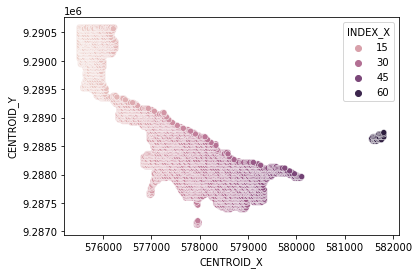

In [73]:
sea.scatterplot(data=lv, x='CENTROID_X', y='CENTROID_Y', hue='INDEX_X')

In [74]:
# preparing df for swath plots

In [77]:
bmf.describe()

,CENTROID_X,CENTROID_Y,CENTROID_Z,DIM_X,DIM_Y,DIM_Z,VOLUME,TOPO,CAVA,MINE,DENS_N,AUX,AUX_TP,IBR,ICE,ICQ,ISO,IHF,IHC,IHMN,IJP,IIN,IFIC,IFP,IND,IR,IK,VAR_IK,NHOLES,NCOMP,FEGL,SIGL,PGL,ALGL,MNGL,PFGL,DILA,ERO,FQGL,TONELADA,AUX_CLASS,REL_X,REL_Y,INDEX_X,INDEX_Y
count,1.045183e+06,1.045183e+06,1.045183e+06,1045183.0,1045183.0,1045183.0,1045183.0,1045183.0,1045183.0,1.045183e+06,1.045183e+06,0.0,167851.0,1.045183e+06,1.045183e+06,1.045183e+06,1.045183e+06,1.045183e+06,1.045183e+06,1.045183e+06,1.045183e+06,1.045183e+06,1.045183e+06,1.045183e+06,167851.0,40891.000000,40891.000000,40891.000000,1.045183e+06,1.045183e+06,12650.000000,12650.000000,12650.000000,12650.000000,12650.000000,12650.000000,167851.000000,167851.0,14864.000000,1.045183e+06,41556.0,1.045183e+06,1.045183e+06,1.045183e+06,1.045183e+06
mean,5.786946e+05,9.288605e+06,2.941508e+02,25.0,25.0,15.0,9375.0,1.0,0.0,8.611466e+01,2.757273e+00,NaN,1.0,1.110406e-03,9.725714e-03,2.973823e-02,1.346087e-01,4.838047e-03,6.616531e-06,3.482666e-06,5.554146e-02,5.802609e-05,3.466247e-01,4.177446e-01,1.0,1.370971,0.168059,1.034686,2.255739e-01,9.024257e-02,55.068596,18.445680,0.068053,1.050854,0.081710,1.452198,0.501832,0.0,99.899680,2.270747e+04,1.0,3.194571e+01,2.005348e+01,3.244600e+01,2.055298e+01
std,1.900576e+03,1.112839e+03,1.282983e+02,0.0,0.0,0.0,0.0,0.0,0.0,3.341544e+01,2.110173e-01,NaN,0.0,3.102883e-02,9.391479e-02,1.622228e-01,3.299668e-01,6.615293e-02,1.545230e-03,8.619620e-04,2.214147e-01,5.754249e-03,4.705354e-01,4.875358e-01,0.0,0.356639,0.310072,0.384588,1.325751e+00,5.425535e-01,11.996083,18.689734,0.122025,1.013413,0.104016,1.789990,0.910293,0.0,0.518033,9.003208e+03,0.0,1.900576e+01,1.112839e+01,1.900433e+01,1.112555e+01
min,5.755125e+05,9.286612e+06,1.075000e+02,25.0,25.0,15.0,9375.0,1.0,0.0,0.000000e+00,2.380000e+00,NaN,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.067816,-0.057495,0.035842,0.000000e+00,0.000000e+00,34.452080,0.161346,0.005000,0.100000,0.004425,0.001000,0.000000,0.0,98.107605,0.000000e+00,1.0,1.250000e-01,1.250000e-01,1.000000e+00,1.000000e+00
25%,5.771125e+05,9.287712e+06,1.975000e+02,25.0,25.0,15.0,9375.0,1.0,0.0,1.000000e+02,2.790000e+00,NaN,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,1.151797,0.000000,0.771656,0.000000e+00,0.000000e+00,42.895950,0.726634,0.010000,0.357274,0.026590,0.338319,0.000000,0.0,99.657730,2.615625e+04,1.0,1.612500e+01,1.112500e+01,1.700000e+01,1.200000e+01
50%,5.785375e+05,9.288562e+06,2.875000e+02,25.0,25.0,15.0,9375.0,1.0,0.0,1.000000e+02,2.790000e+00,NaN,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,1.408638,0.000000,1.060908,0.000000e+00,0.000000e+00,60.622982,8.222802,0.017600,0.680167,0.048100,0.602277,0.000000,0.0,99.841805,2.615625e+04,1.0,3.037500e+01,1.962500e+01,3.100000e+01,2.000000e+01
75%,5.802875e+05,9.289538e+06,3.775000e+02,25.0,25.0,15.0,9375.0,1.0,0.0,1.000000e+02,2.790000e+00,NaN,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.0,1.661903,0.195177,1.359520,0.000000e+00,0.000000e+00,66.674370,36.961765,0.032200,1.382400,0.071278,2.087591,1.000000,0.0,100.222412,2.615625e+04,1.0,4.787500e+01,2.937500e+01,4.800000e+01,3.000000e+01
max,5.822875e+05,9.290588e+06,7.525000e+02,25.0,25.0,15.0,9375.0,1.0,0.0,1.000000e+02,3.350000e+00,NaN,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.203260e-01,4.615640e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.961026,1.032448,1.686898,1.600000e+01,1.000000e+01,69.726151,50.733898,0.679073,5.042549,0.642028,7.311543,3.000000,0.0,100.999115,3.140625e+04,1.0,6.787500e+01,3.987500e+01,6.800000e+01,4.000000e+01


In [79]:
swath_x = bmf.groupby('INDEX_X').agg({'FEGL':['min', 'mean', 'max'], 'TONELADA':'sum'})
swath_x

FEGL                            TONELADA
               min       mean        max           sum
INDEX_X                                               
1.0            NaN        NaN        NaN  3.471923e+08
2.0            NaN        NaN        NaN  3.585903e+08
3.0            NaN        NaN        NaN  3.695545e+08
4.0            NaN        NaN        NaN  3.672879e+08
5.0            NaN        NaN        NaN  3.604373e+08
6.0            NaN        NaN        NaN  3.525468e+08
7.0            NaN        NaN        NaN  3.522460e+08
8.0            NaN        NaN        NaN  3.547915e+08
9.0            NaN        NaN        NaN  3.564498e+08
10.0           NaN        NaN        NaN  3.593786e+08
11.0           NaN        NaN        NaN  3.637879e+08
12.0           NaN        NaN        NaN  3.687139e+08
13.0           NaN        NaN        NaN  3.790307e+08
14.0           NaN        NaN        NaN  3.953237e+08
15.0           NaN        NaN        NaN  4.078186e+08
16.0           NaN        NaN        NaN  4.141780e+08
17.0           NaN        NaN        NaN  4.146302e+08
18.0           NaN        NaN        NaN  4.167276e+08
19.0           NaN        NaN        NaN  4.161199e+08
20.0           NaN        NaN        NaN  4.178753e+08
21.0           NaN        NaN        NaN  4.253274e+08
22.0     44.058865  45.697922  47.336979  4.371092e+08
23.0     44.058865  45.623419  47.336979  4.500442e+08
24.0     44.058865  45.551578  47.336979  4.570799e+08
25.0     44.058865  45.496906  47.336979  4.586129e+08
26.0     39.485859  45.897010  62.516899  4.407000e+08
27.0     34.858898  50.026720  66.651031  4.259662e+08
28.0     34.858898  52.942137  69.726151  4.205754e+08
29.0     34.858898  55.780151  69.726151  4.236185e+08
30.0     34.452080  56.974890  69.726151  4.214456e+08
31.0     34.452080  56.709604  69.726151  4.181709e+08
32.0     34.452080  57.254401  69.726151  4.118453e+08
33.0     34.452080  56.377706  68.648430  4.038484e+08
34.0     37.972248  53.839238  68.648430  3.932634e+08
35.0           NaN        NaN        NaN  3.832272e+08
36.0           NaN        NaN        NaN  3.759284e+08
37.0           NaN        NaN        NaN  3.720034e+08
38.0           NaN        NaN        NaN  3.649594e+08
39.0           NaN        NaN        NaN  3.507802e+08
40.0           NaN        NaN        NaN  3.361972e+08
41.0           NaN        NaN        NaN  3.259910e+08
42.0           NaN        NaN        NaN  3.156547e+08
43.0           NaN        NaN        NaN  3.050741e+08
44.0           NaN        NaN        NaN  2.924095e+08
45.0           NaN        NaN        NaN  2.859462e+08
46.0           NaN        NaN        NaN  2.820528e+08
47.0           NaN        NaN        NaN  2.795402e+08
48.0           NaN        NaN        NaN  2.764969e+08
49.0           NaN        NaN        NaN  2.737132e+08
50.0           NaN        NaN        NaN  2.732628e+08
51.0           NaN        NaN        NaN  2.747563e+08
52.0           NaN        NaN        NaN  2.755989e+08
53.0           NaN        NaN        NaN  2.824503e+08
54.0           NaN        NaN        NaN  2.951198e+08
55.0           NaN        NaN        NaN  3.027333e+08
56.0           NaN        NaN        NaN  3.053802e+08
57.0           NaN        NaN        NaN  3.055050e+08
58.0           NaN        NaN        NaN  2.984262e+08
59.0           NaN        NaN        NaN  2.959261e+08
60.0           NaN        NaN        NaN  2.878072e+08
61.0           NaN        NaN        NaN  2.862371e+08
62.0           NaN        NaN        NaN  2.840565e+08
63.0           NaN        NaN        NaN  2.802108e+08
64.0           NaN        NaN        NaN  2.772733e+08
65.0           NaN        NaN        NaN  2.699285e+08
66.0           NaN        NaN        NaN  2.635137e+08
67.0           NaN        NaN        NaN  2.519374e+08
68.0           NaN        NaN        NaN  2.430795e+08

In [119]:
swath_x_hem = bmf[bmf.LITO.isin(['HC', 'HF', 'HMN'])].groupby('INDEX_X').agg({'FEGL':['min', 'mean', 'max'], 'TONELADA':'sum'})
swath_x_jp = bmf[bmf.LITO.isin(['JP'])].groupby('INDEX_X').agg({'FEGL':['min', 'mean', 'max'], 'TONELADA':'sum'})

In [122]:
swath_x_hem

FEGL                            TONELADA
               min       mean        max           sum
INDEX_X                                               
3.0            NaN        NaN        NaN  2.700000e+05
4.0            NaN        NaN        NaN  3.000000e+04
6.0            NaN        NaN        NaN  1.170000e+06
7.0            NaN        NaN        NaN  6.419740e+06
8.0            NaN        NaN        NaN  6.929733e+06
9.0            NaN        NaN        NaN  3.299918e+06
10.0           NaN        NaN        NaN  8.399376e+05
11.0           NaN        NaN        NaN  1.500000e+05
12.0           NaN        NaN        NaN  2.392364e+05
13.0           NaN        NaN        NaN  2.056062e+05
14.0           NaN        NaN        NaN  2.696011e+05
15.0           NaN        NaN        NaN  1.727369e+05
27.0     62.860001  64.395839  66.651031  2.880000e+06
28.0     60.174225  65.473147  69.726151  1.752000e+07
29.0     60.130501  67.522251  69.726151  2.307000e+07
30.0     60.130501  68.057078  69.726151  2.310421e+07
31.0     60.256001  67.493538  69.726151  2.306932e+07
32.0     60.256001  66.659984  69.726151  2.183629e+07
33.0     61.938942  66.662784  68.648430  1.379765e+07
34.0     64.520882  66.994938  68.648430  5.669304e+06
35.0           NaN        NaN        NaN  4.482460e+05

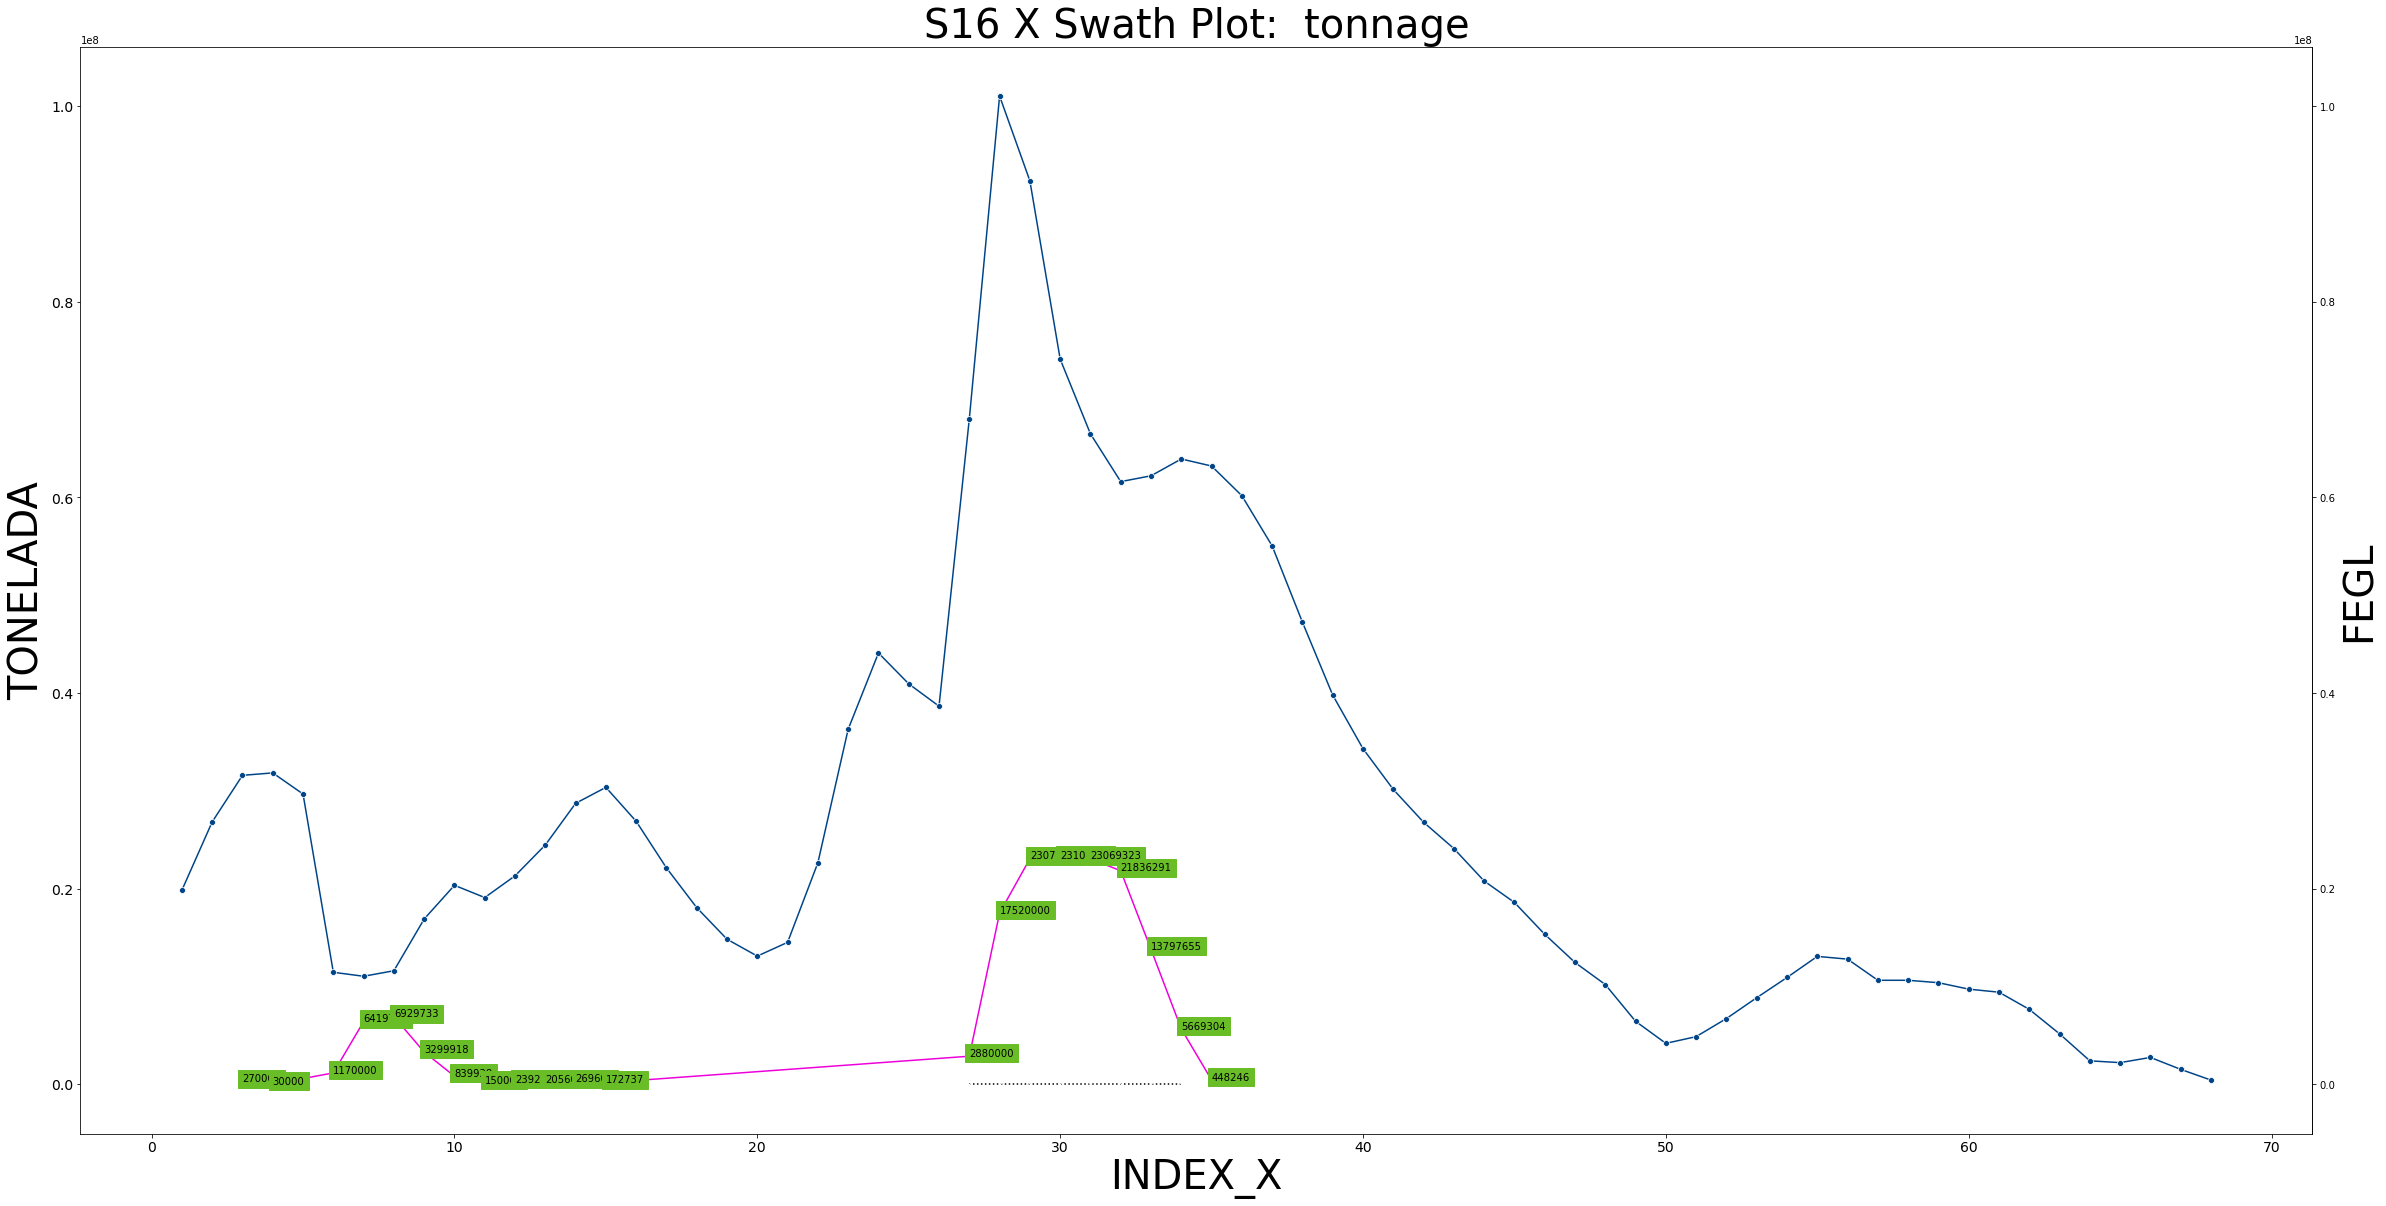

In [155]:
fig, ax = plt.subplots(figsize=(40,20))
y1='TONELADA'
xcode = 'INDEX_X'
grade = 'FEGL'
df  = swath_x
df2 = swath_x_hem
df3 = swath_x_jp
#ln = sea.lineplot(data=df, x='INDEX_X', y=('TONELADA', 'sum'), marker='o', color=valecolor['VERDE'])
ln = sea.lineplot(data=df2, x=xcode, y=(y1, 'sum'), marker='x', color=litocolor['HF'])
plt.ylabel(y1, fontsize=40);
plt.xlabel(xcode, fontsize=40);

secax=ax.secondary_yaxis('right')

fegl =sea.lineplot(data=df2, x=xcode, y=('FEGL', 'mean'), ls=':', marker='x', color='black')

#plt.ylim(60,70)
sea.lineplot(data=df3, x=xcode, y=('TONELADA', 'sum'), marker='o', color=litocolor['JP'])

plt.title( proj + ' X Swath Plot:  tonnage', fontsize=40);

secax.set_ylabel(grade, fontsize=40);

plt.tick_params(axis='both', which='major', labelsize=14)

# label points on the plot
for x, y in zip(df2.index, df2['TONELADA', 'sum']):
 # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
 plt.text(x = x, # x-coordinate position of data label
     y = y,#-150, # y-coordinate position of data label, adjusted to be 150 below the data point
     s = '{:.0f}'.format(y)).set_backgroundcolor(valecolor['VERDE2'])


plt.show()

In [ ]:
bmf['IR'].describe()

In [ ]:
fig, ax = plt.subplots(figsize=chart_size)

df=bmf_full
#grade = ['']

sca=sea.scatterplot(data=classified, x="IK", y="VAR_IK", hue="RECURSO",palette=rec_color, s=40, style='RECURSO',alpha=1)

sca.set_title(proj + '_CLASS_VARIABLES' + '\nN: ' + str(df['IK'].count()))

fig.savefig(proj + '_CLASS_VARIABLES_scatter.jpeg', transparent=None)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=chart_size)
sea.kdeplot(data=bmf, x='IR', hue='RECURSO', bw_adjust=0.20 )

In [ ]:
fig, ax = plt.subplots(figsize=chart_size)

df=bmf_full
#grade = ['']

sca=sea.scatterplot(data=med, x="IK", y="VAR_IK", hue="LITO",palette=litocolor, s=40, style='RECURSO',alpha=1)

sca.set_title(proj + '_MEASURED_REC_ALL_BLOCKS' + '\nN: ' + str(med['IK'].count()))

fig.savefig(proj + '_MEASURED_VARIABLES_scatter.jpeg', transparent=None)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=chart_size)

df=bmf_full
#grade = ['']

sca=sea.scatterplot(data=ind, x="IK", y="VAR_IK", hue="LITO",palette=litocolor, s=40, style='RECURSO',alpha=1)

sca.set_title(proj + '_INDICATED_REC_ALL_BLOCKS' + '\nN: ' + str(ind['IK'].count()))

fig.savefig(proj + '_INDICATED_VARIABLES_scatter.jpeg', transparent=None)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=chart_size)

sca=sea.scatterplot(data=inf, x="IK", y="VAR_IK", hue="LITO",palette=litocolor, s=40, style='RECURSO',alpha=1)

sca.set_title(proj + '_INFERED_REC_ALL_BLOCKS' + '\nN: ' + str(inf['IK'].count()))

fig.savefig(proj + '_INFERED_VARIABLES_scatter.jpeg', transparent=None)
plt.show()

In [227]:
bmf.head(5)

,CENTROID_X,CENTROID_Y,CENTROID_Z,DIM_X,DIM_Y,DIM_Z,VOLUME,TOPO,CAVA,LITO_LF,LITO_LP,LITO,MINE,DENS_N,AUX,AUX_TP,IBR,ICE,ICQ,ISO,IHF,IHC,IHMN,IJP,IIN,IFIC,IFP,IND,IR,IK,VAR_IK,RECURSO,INVENTORY,NHOLES,NCOMP,FEGL,SIGL,PGL,ALGL,MNGL,PFGL,DILA,ERO,REC_MALHA,FQGL,TONELADA,PRODUCT,LITO_3D,AUX_CLASS
0,575512.5,9286612.5,107.5,25.0,25.0,15.0,9375.0,1,0,fp,vazio,FP,100.0,2.79,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,N,n,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n,NaN,26156.25,n,fp,NaN
1,575512.5,9286612.5,122.5,25.0,25.0,15.0,9375.0,1,0,fp,vazio,FP,100.0,2.79,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,N,n,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n,NaN,26156.25,n,fp,NaN
2,575537.5,9286612.5,122.5,25.0,25.0,15.0,9375.0,1,0,fp,vazio,FP,100.0,2.79,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,N,n,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n,NaN,26156.25,n,fp,NaN
3,575512.5,9286637.5,122.5,25.0,25.0,15.0,9375.0,1,0,fp,vazio,FP,100.0,2.79,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,N,n,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n,NaN,26156.25,n,fp,NaN
4,575537.5,9286637.5,122.5,25.0,25.0,15.0,9375.0,1,0,fp,vazio,FP,100.0,2.79,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,N,n,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n,NaN,26156.25,n,fp,NaN


In [272]:
bmf.groupby('LITO').count()

,CENTROID_X,CENTROID_Y,CENTROID_Z,DIM_X,DIM_Y,DIM_Z,VOLUME,TOPO,CAVA,LITO_LF,LITO_LP,MINE,DENS_N,AUX,AUX_TP,IBR,ICE,ICQ,ISO,IHF,IHC,IHMN,IJP,IIN,IFIC,IFP,IND,IR,IK,VAR_IK,RECURSO,INVENTORY,NHOLES,NCOMP,FEGL,SIGL,PGL,ALGL,MNGL,PFGL,DILA,ERO,REC_MALHA,FQGL,TONELADA,PRODUCT,LITO_3D,AUX_CLASS
LITO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BR,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,0,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1146,1146,1146,1163,1163,1163,1163,0,0,0,0,0,0,1163,1163,1163,0,1163,1163,1163,1163
CE,10132,10132,10132,10132,10132,10132,10132,10132,10132,10132,10132,10132,10132,0,9988,10132,10132,10132,10132,10132,10132,10132,10132,10132,10132,10132,9988,5393,5393,5393,10132,10132,10132,10132,2531,2531,2531,2531,2531,2531,9988,9988,10132,2531,10132,10132,10132,1441
CQ,29118,29118,29118,29118,29118,29118,29118,29118,29118,29118,29118,29118,29118,0,6351,29118,29118,29118,29118,29118,29118,29118,29118,29118,29118,29118,6351,2033,2033,2033,29118,29118,29118,29118,0,0,0,0,0,0,6351,6351,29118,0,29118,29118,29118,2268
FIC,362482,362482,362482,362482,362482,362482,362482,362482,362482,362482,362482,362482,362482,0,35226,362482,362482,362482,362482,362482,362482,362482,362482,362482,362482,362482,35226,4216,4216,4216,362482,362482,362482,362482,0,0,0,0,0,0,35226,35226,362482,0,362482,362482,362482,11889
FP,436724,436724,436724,436724,436724,436724,436724,436724,436724,436724,436724,436724,436724,0,47098,436724,436724,436724,436724,436724,436724,436724,436724,436724,436724,436724,47098,9398,9398,9398,436724,436724,436724,436724,0,0,0,0,0,0,47098,47098,436724,0,436724,436724,436724,11334
HC,3,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0
HF,5045,5045,5045,5045,5045,5045,5045,5045,5045,5045,5045,5045,5045,0,5045,5045,5045,5045,5045,5045,5045,5045,5045,5045,5045,5045,5045,4344,4344,4344,5045,5045,5045,5045,4065,4065,4065,4065,4065,4065,5045,5045,5045,4121,5045,5045,5045,668
IN,49,49,49,49,49,49,49,49,49,49,49,49,49,0,49,49,49,49,49,49,49,49,49,49,49,49,49,32,32,32,49,49,49,49,0,0,0,0,0,0,49,49,49,0,49,49,49,49
JP,58021,58021,58021,58021,58021,58021,58021,58021,58021,58021,58021,58021,58021,0,58021,58021,58021,58021,58021,58021,58021,58021,58021,58021,58021,58021,58021,14296,14296,14296,58021,58021,58021,58021,6051,6051,6051,6051,6051,6051,58021,58021,58021,8209,58021,58021,58021,12573


In [273]:
bmf.LITO_3D.unique()

array(['fp', 'jp', 'fic', 'in', 'so', 'br', 'hf', 'cq', 'ce', 'hc'],
      dtype=object)

In [274]:
#total where fegl is assigned
vol_bmf = bmf.loc[0:, ['VOLUME', 'LITO']]
total_vol = vol_bmf.groupby('LITO').sum()
total_vol

,VOLUME
LITO,
BR,1.090312e+07
CE,9.498750e+07
CQ,2.729812e+08
FIC,3.398269e+09
FP,4.094288e+09
HC,2.812500e+04
HF,4.729688e+07
IN,4.593750e+05
JP,5.439469e+08


In [275]:
#full bmf volume
vol_bmf = bmf_full.loc[0:, ['VOLUME', 'LITO']]
total_vol = vol_bmf.groupby('LITO').sum()
total_vol

,VOLUME
LITO,
BR,1.090312e+07
CE,9.498750e+07
CQ,2.729812e+08
FIC,3.398269e+09
FP,4.094288e+09
HC,2.812500e+04
HF,4.729688e+07
IN,4.593750e+05
JP,5.439469e+08


In [276]:
total_vol.to_csv(proj + '_vol_by_lito.csv')

In [277]:
bmf_gl = bmf.loc[0:, ['LITO'] + teores_gl]

In [278]:
fso.groupby('CLI').count()

,FURO,NA,DE,ATE,COMP,CLV,CLM,INTEMP,ESTRAT,FEGL,SIGL,PGL,ALGL,MNGL,PFGL,TIGL,MGGL,CAGL,KGL,CUGL,G1,G1A,G1B,G2,G2A,G2B,G3,FGRA,FQGL,REC_AM,FEGLA,SIGLA,PGLA,ALGLA,MNGLA,PFGLA,TIGLA,MGGLA,CAGLA,KGLA,CUGLA,FOGLA,HGLA
CLI,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BR,35,35,35,35,35,35,35,35,35,7,7,7,7,7,7,7,7,7,7,7,1,1,1,1,1,1,1,1,7,35,7,7,7,7,7,7,7,7,7,7,7,7,7
CE,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,4,30,26,26,26,26,26,26,26,26,30,30,4,4,4,4,4,4,4,4,4,4,4,0,10
CQ,30,30,30,30,30,30,30,30,30,22,22,22,22,22,22,22,22,22,12,14,11,11,11,11,11,11,11,11,22,30,12,12,12,12,12,12,12,12,12,12,8,2,15
HC,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,1,10,10,10,10,10,10,10,10,10,11,11,1,1,1,1,1,1,1,1,1,1,0,0,3
HF,165,165,165,165,165,165,165,165,165,162,162,162,162,162,161,162,162,162,9,161,155,155,155,155,155,155,155,155,162,165,9,9,9,9,9,9,9,9,9,9,8,2,76
HMN,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,3,12,10,10,10,10,10,10,10,10,13,13,3,3,3,3,3,3,3,3,3,3,2,0,6
JP,177,177,177,177,177,177,177,177,177,107,107,107,107,107,107,107,107,107,27,105,89,89,89,89,89,89,89,89,107,177,27,27,27,27,27,27,27,27,27,27,25,21,53
MD,82,82,82,82,82,82,82,82,82,27,27,27,27,27,27,27,27,27,26,27,1,1,1,1,1,1,1,1,27,82,26,26,26,26,26,26,26,26,26,26,26,24,21
MS,8,8,8,8,8,8,8,8,8,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,8,1,1,1,1,1,1,1,1,1,1,1,1,0


In [279]:
cac.groupby('GEOCOD').count()

,COMPID,DHID,MIDX,MIDY,MIDZ,LENGTH,FROM,TO,BOUND,EXTREM,FEGL,SIGL,PGL,ALGL,MNGL,PFGL,CAGL,MGGL,TIGL,V_IND1,V_IND2,IK,V_IND
GEOCOD,,,,,,,,,,,,,,,,,,,,,,,
AT,6,6,6,6,6,6,6,6,0,0,5,5,5,5,5,5,6,6,6,6,0,6,6
CE,24,24,24,24,24,24,24,24,0,0,24,24,24,24,24,24,24,24,24,24,0,24,24
CQ,21,21,21,21,21,21,21,21,0,0,18,18,18,18,18,18,21,21,21,21,0,21,21
HC,9,9,9,9,9,9,9,9,0,0,9,9,9,9,9,9,9,9,9,9,0,9,9
HF,121,121,121,121,121,121,121,121,0,0,118,118,118,118,118,118,121,121,121,121,0,121,121
HMN,12,12,12,12,12,12,12,12,0,0,12,12,12,12,12,12,12,12,12,12,0,12,12
JP,176,176,176,176,176,176,176,176,0,0,73,73,73,73,73,73,176,176,176,176,0,176,176
MD,169,169,169,169,169,169,169,169,0,0,31,31,31,31,31,31,169,169,169,169,0,169,169
MS,17,17,17,17,17,17,17,17,0,0,1,1,1,1,1,1,17,17,17,17,0,17,17


In [280]:
bmf_gl.head(5)

,LITO,FEGL,SIGL,PGL,ALGL,MNGL,PFGL
0,FP,NaN,NaN,NaN,NaN,NaN,NaN
1,FP,NaN,NaN,NaN,NaN,NaN,NaN
2,FP,NaN,NaN,NaN,NaN,NaN,NaN
3,FP,NaN,NaN,NaN,NaN,NaN,NaN
4,FP,NaN,NaN,NaN,NaN,NaN,NaN


In [281]:
VCOUNT = bmf_gl.count()

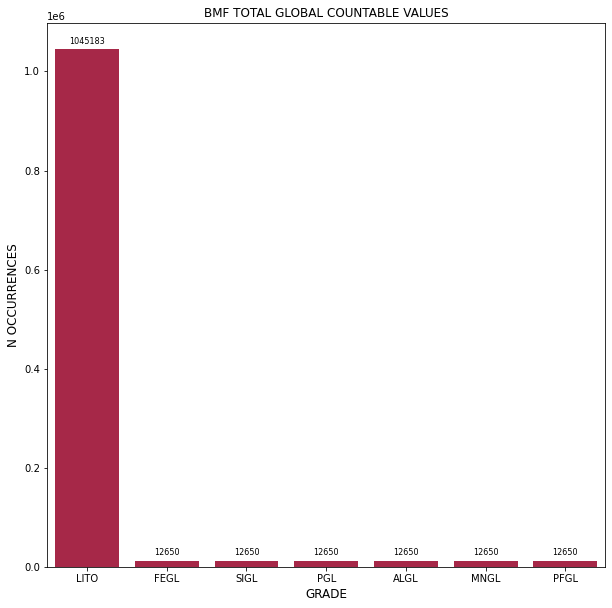

In [282]:
fig=plt.figure(figsize=chart_size)

plots=sea.barplot(x=VCOUNT.index, y=VCOUNT.values, color=valecolor['VERMELHO'])

# ITERATING OVER THE THE BARS
for bar in plots.patches:
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0F'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.title('BMF TOTAL GLOBAL COUNTABLE VALUES')
plt.ylabel('N OCCURRENCES', fontsize=12)
plt.xlabel('GRADE', fontsize=12)

plt.show()

fig.savefig(proj + '_BMF_GLOBAL_GRADE_counts.jpeg', transparent=None)

In [283]:
fso_krig = fso.loc[0:,  v_krig]

In [284]:
VCOUNT = fso_krig.count()

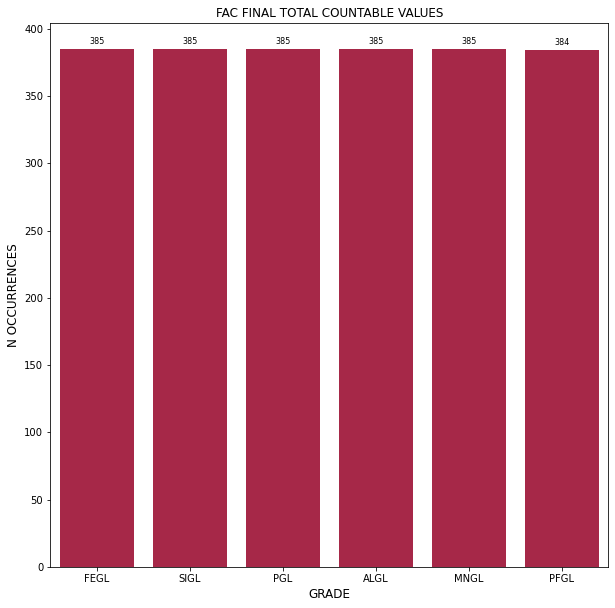

In [285]:
fig=plt.figure(figsize=chart_size)

plots=sea.barplot(x=VCOUNT.index, y=VCOUNT.values, color=valecolor['VERMELHO'])

# ITERATING OVER THE THE BARS
for bar in plots.patches:
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0F'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.title('FAC FINAL TOTAL COUNTABLE VALUES')
plt.ylabel('N OCCURRENCES', fontsize=12)
plt.xlabel('GRADE', fontsize=12)

plt.show()

fig.savefig(proj + '_FAC_FINAL_counts.jpeg', transparent=None)

In [286]:
fso_krig.describe()

,FEGL,SIGL,PGL,ALGL,MNGL,PFGL
count,385.000000,385.000000,385.000000,385.000000,385.000000,384.000000
mean,53.730145,15.230858,0.064341,3.850396,0.232590,3.188558
std,16.285007,20.254238,0.102196,7.109768,0.553049,3.965205
min,8.970000,0.106000,0.004400,0.100000,0.004400,0.001000
25%,42.940600,0.690000,0.012900,0.418100,0.038500,0.531025
50%,61.500000,2.183700,0.024100,0.926300,0.062700,1.542200
75%,67.078700,29.984400,0.059200,2.938800,0.149000,4.491300
max,69.761300,80.774100,0.795700,41.500000,4.977000,21.720000


<AxesSubplot:xlabel='COMP', ylabel='Count'>

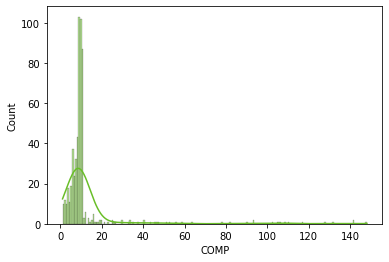

In [287]:
# HISTOGRAMA DE LENGTH
sea.histplot(data=fso, x="COMP", color=valecolor['VERDE2'], kde=True)

In [288]:
fso_sampled = fso[~fso['FEGL'].isna()]
cac_sampled = cac[~cac['FEGL'].isna()]

In [289]:
import ipywidgets as widgets

In [290]:
sl=widgets.IntSlider(
    value=2,
    min=0,
    max=10,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

In [291]:
def make_kde(bw):
    sea.kdeplot(data=fso, x="COMP", color=valecolor['VERDE2'], bw_adjust=bw)

interactive(children=(FloatSlider(value=2.5000000000000004, description='bw', max=5.0, min=0.1), Output()), _d…

<function __main__.make_kde(bw)>

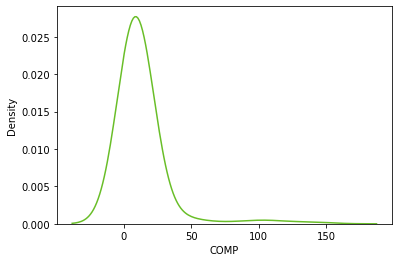

In [292]:
widgets.interact(make_kde, bw=(0.1,5,0.1))

<AxesSubplot:xlabel='COMP', ylabel='Count'>

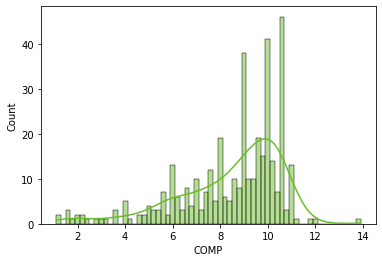

In [293]:
sea.histplot(data=fso_sampled, x="COMP", color=valecolor['VERDE2'], binwidth=0.2,kde=True)

<AxesSubplot:xlabel='LENGTH', ylabel='Count'>

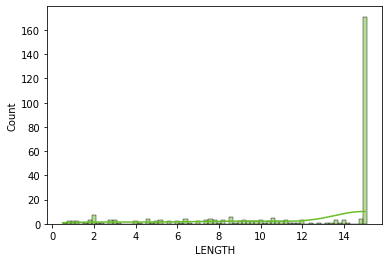

In [294]:
sea.histplot(data=cac_sampled, x="LENGTH", color=valecolor['VERDE2'], binwidth=0.2,kde=True)

In [295]:
bmf_gl.describe()

,FEGL,SIGL,PGL,ALGL,MNGL,PFGL
count,12650.000000,12650.000000,12650.000000,12650.000000,12650.000000,12650.000000
mean,55.068596,18.445680,0.068053,1.050854,0.081710,1.452198
std,11.996083,18.689734,0.122025,1.013413,0.104016,1.789990
min,34.452080,0.161346,0.005000,0.100000,0.004425,0.001000
25%,42.895950,0.726634,0.010000,0.357274,0.026590,0.338319
50%,60.622982,8.222802,0.017600,0.680167,0.048100,0.602277
75%,66.674370,36.961765,0.032200,1.382400,0.071278,2.087591
max,69.726151,50.733898,0.679073,5.042549,0.642028,7.311543


In [296]:
bmf.LITO.unique()

['FP', 'JP', 'FIC', 'IN', 'SO', 'BR', 'HF', 'CQ', 'CE', 'HC']
Categories (10, object): ['BR', 'CE', 'CQ', 'FIC', ..., 'HF', 'IN', 'JP', 'SO']

In [297]:
fso.CLI.unique()

array(['CQ', 'MD', 'MSD', 'CE', 'MS', 'HMN', 'HC', 'HF', 'JP', 'BR'],
      dtype=object)

In [298]:
cac.GEOCOD.unique()

array(['CQ', 'MD', 'MSD', 'CE', 'MS', 'HMN', 'HC', 'HF', 'JP', 'AT'],
      dtype=object)

In [299]:
fso = fso[~fso['CLI'].isin(['SR', 'DT', 'VQ', 'AT', 'MD_DK', 'MSD_DK', 'QZC'])]
cac = cac[~cac['GEOCOD'].isin(['SR', 'DT', 'BR', 'QZC', 'VQ'])]

cac_hem = cac[cac['GEOCOD'].isin(['HC', 'HF'])]

In [300]:
cac_hem

,COMPID,DHID,MIDX,MIDY,MIDZ,LENGTH,FROM,TO,GEOCOD,BOUND,EXTREM,FEGL,SIGL,PGL,ALGL,MNGL,PFGL,CAGL,MGGL,TIGL,V_IND1,V_IND2,IK,V_IND
104,15MFLP,S16-FD00008,578212.400,9288027.761,622.600,5.15,38.00,43.15,HC,NaN,NaN,63.360,0.600,0.159,4.270,0.132,4.400,0.0,0.0,0.0,1,NaN,1,1
105,15MFLP,S16-FD00008,578212.287,9288027.959,616.855,6.35,43.15,49.50,HF,NaN,NaN,63.300,0.580,0.170,2.770,0.124,5.400,0.0,0.0,0.0,1,NaN,1,1
106,15MFLP,S16-FD00008,578212.137,9288028.192,609.935,7.50,49.50,57.00,HC,NaN,NaN,62.873,0.743,0.122,2.480,0.129,5.481,0.0,0.0,0.0,1,NaN,1,1
107,15MFLP,S16-FD00008,578211.971,9288028.563,598.692,15.00,57.00,72.00,HF,NaN,NaN,63.292,0.875,0.127,2.247,0.445,5.532,0.0,0.0,0.0,1,NaN,1,1
108,15MFLP,S16-FD00008,578211.739,9288029.053,583.702,15.00,72.00,87.00,HF,NaN,NaN,64.493,0.820,0.072,1.575,0.143,4.651,0.0,0.0,0.0,1,NaN,1,1
109,15MFLP,S16-FD00008,578211.538,9288029.481,570.961,10.50,87.00,97.50,HF,NaN,NaN,64.674,0.869,0.059,1.411,0.339,3.812,0.0,0.0,0.0,1,NaN,1,1
112,15MFLP,S16-FD00008,578211.030,9288030.406,543.131,11.20,114.50,125.70,HF,NaN,NaN,66.408,0.545,0.017,2.453,0.149,2.217,0.0,0.0,0.0,1,NaN,1,1
115,15MFLP,S16-FD00008,578210.444,9288031.292,519.255,15.00,136.50,151.50,HF,NaN,NaN,65.238,1.199,0.055,0.805,0.209,3.148,0.0,0.0,0.0,1,NaN,1,1
116,15MFLP,S16-FD00008,578210.038,9288031.879,504.272,15.00,151.50,166.50,HF,NaN,NaN,63.806,1.025,0.025,4.189,0.158,2.463,0.0,0.0,0.0,1,NaN,1,1
117,15MFLP,S16-FD00008,578209.635,9288032.372,489.286,15.00,166.50,181.50,HF,NaN,NaN,60.174,4.693,0.034,5.043,0.357,3.319,0.0,0.0,0.0,1,NaN,1,1


<AxesSubplot:xlabel='FEGL', ylabel='Count'>

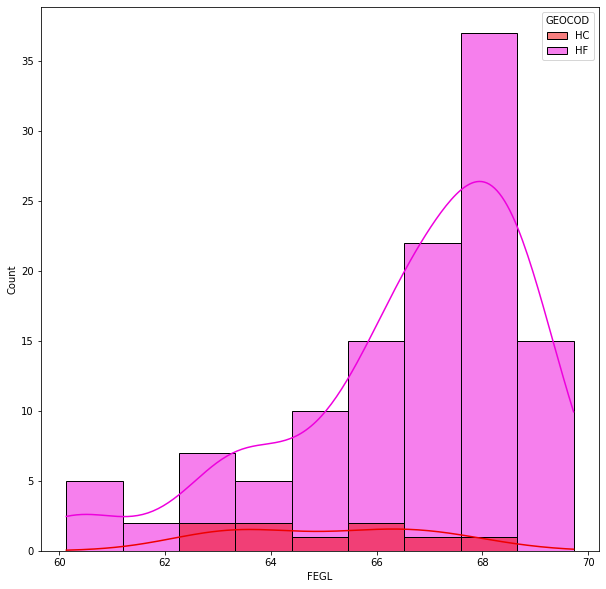

In [301]:
fig=plt.figure(figsize=chart_size)

sea.histplot(data= cac_hem, x=cac_hem['FEGL'], hue=cac_hem['GEOCOD'], palette=litocolor, kde=True)

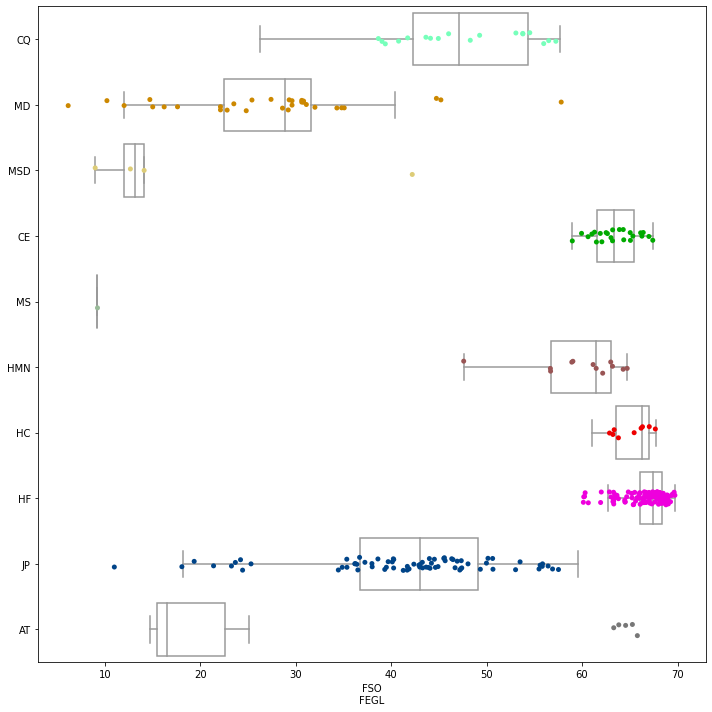

In [302]:
fig=plt.figure(figsize=chart_size)

#sea.boxplot(x=fso.FEGL, y=fso.CLI, whis=0, color='white', fliersize=0)
sea.boxplot(x=fso.FEGL, y=fso.CLI, color='white', fliersize=0)
sea.stripplot(x=cac.FEGL, y=cac.GEOCOD, palette=litocolor)
#sea.stripplot(x=CAC.FEGL, y=fso.CLI, palette=litocolor)
plt.xlabel('FSO\nFEGL')
plt.ylabel('')
#plt.yticks([0, 1, 2], ['USA', 'Europe', 'Japan'])
plt.tight_layout();

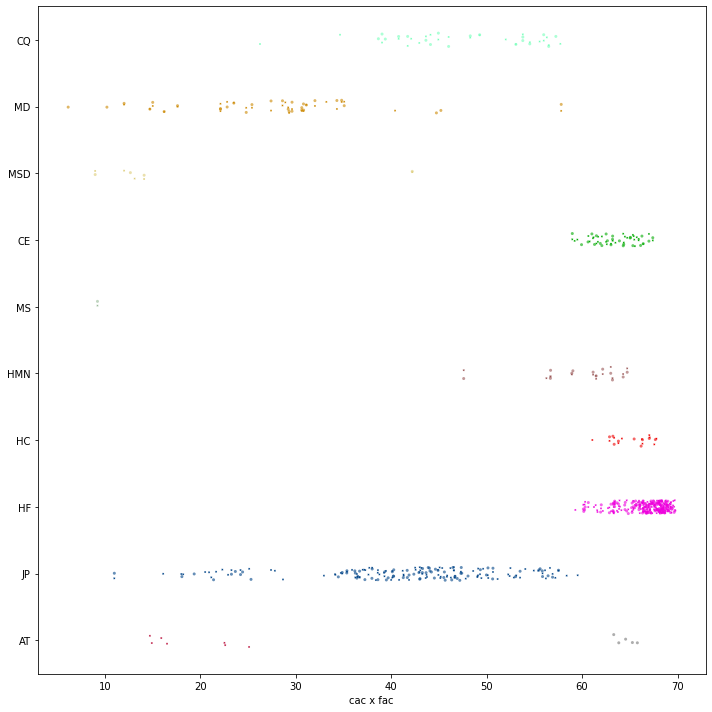

In [303]:
fig=plt.figure(figsize=chart_size)

#sea.boxplot(x=fso.FEGL, y=fso.CLI, whis=0, color='white', fliersize=0)
#sea.boxplot(x=fso.FEGL, y=fso.CLI, color='white', fliersize=0)
sea.stripplot(x=fso['FEGL'], y=fso['CLI'], palette=litocolor, size=2,  marker='X')
sea.stripplot(x=cac.FEGL, y=cac.GEOCOD, palette=litocolor, size=3, marker='o', alpha = 0.6)
plt.xlabel('cac x fac')
plt.ylabel('')
#plt.yticks([0, 1, 2], ['USA', 'Europe', 'Japan'])
plt.tight_layout();

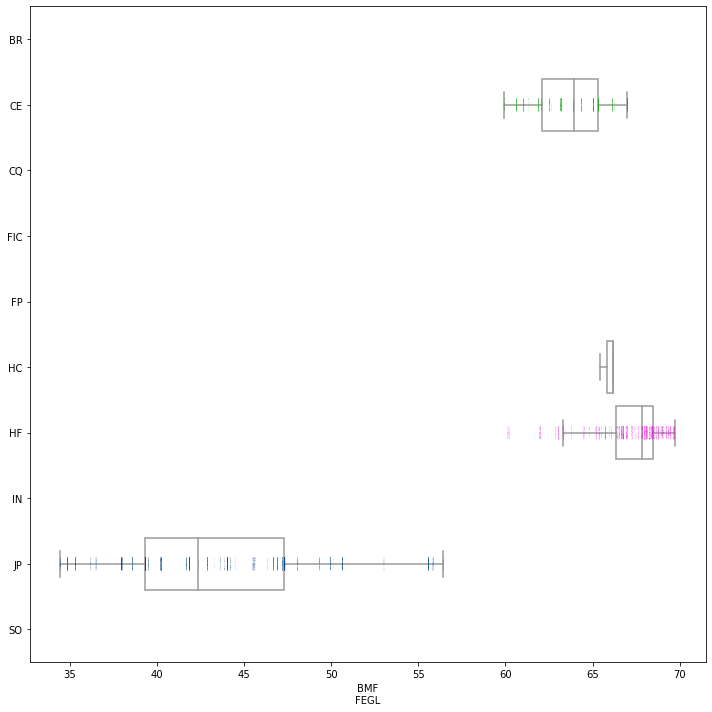

In [304]:
fig=plt.figure(figsize=chart_size)

#sea.boxplot(x=fso.FEGL, y=fso.CLI, whis=0, color='white', fliersize=0)
sea.boxplot(x=bmf.FEGL, y=bmf.LITO, color='white', fliersize=0)
#sea.stripplot(x=bmf.FEGL, y=bmf.LITO, palette=litocolor)
sea.stripplot(x=bmf.FEGL, y=bmf.LITO, palette=litocolor,  size=0.3)
plt.xlabel('BMF\nFEGL')
plt.ylabel('')

plt.tight_layout();

C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


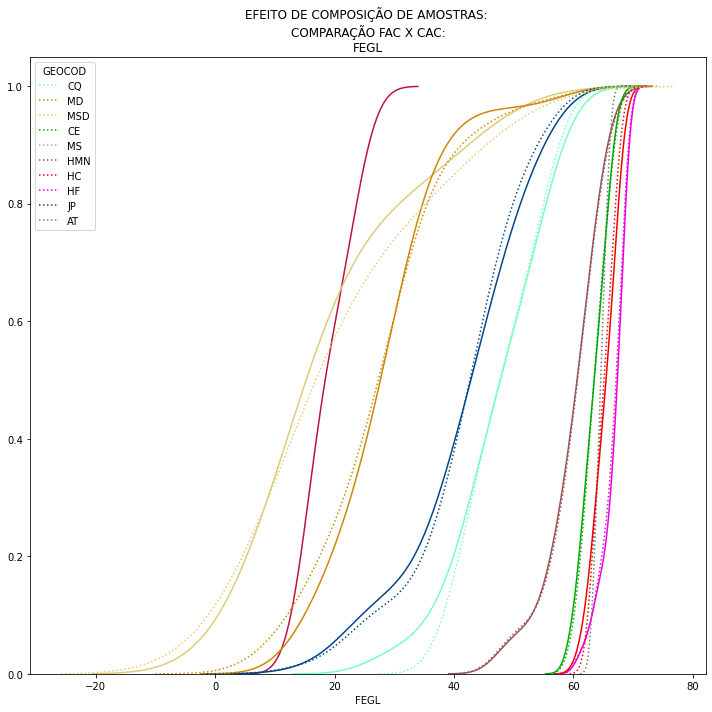

In [305]:
fig=plt.figure(figsize=chart_size)
grade='FEGL'

sea.kdeplot(data=fso, x=fso[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)

plt.tight_layout();

C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


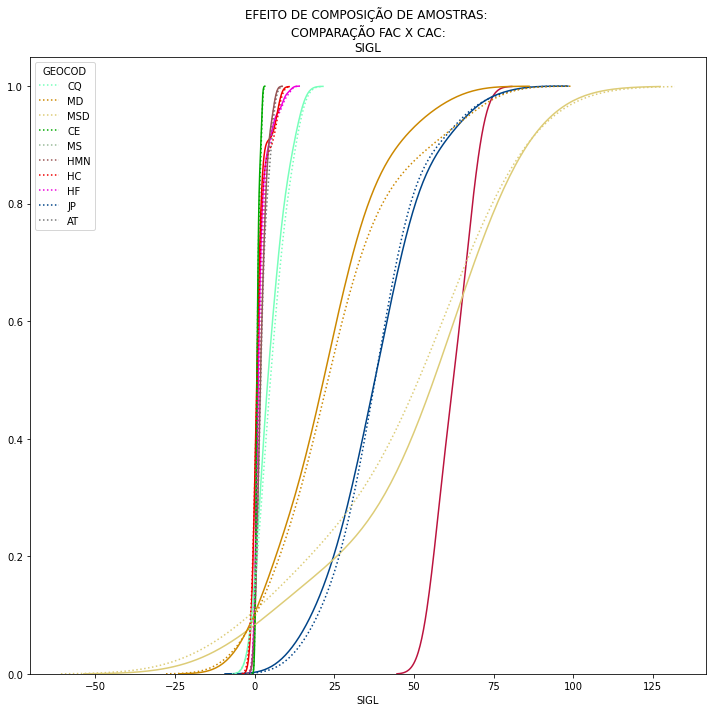

In [306]:
fig=plt.figure(figsize=chart_size)
grade='SIGL'

sea.kdeplot(data=fso, x=fso[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)


plt.tight_layout();

C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


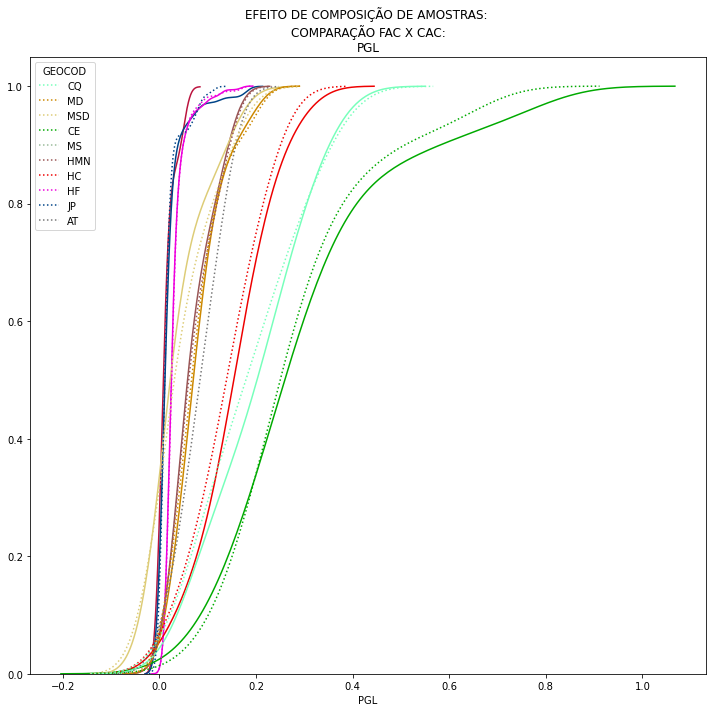

In [307]:
fig=plt.figure(figsize=chart_size)
grade='PGL'

sea.kdeplot(data=fso, x=fso[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)


plt.tight_layout();

C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


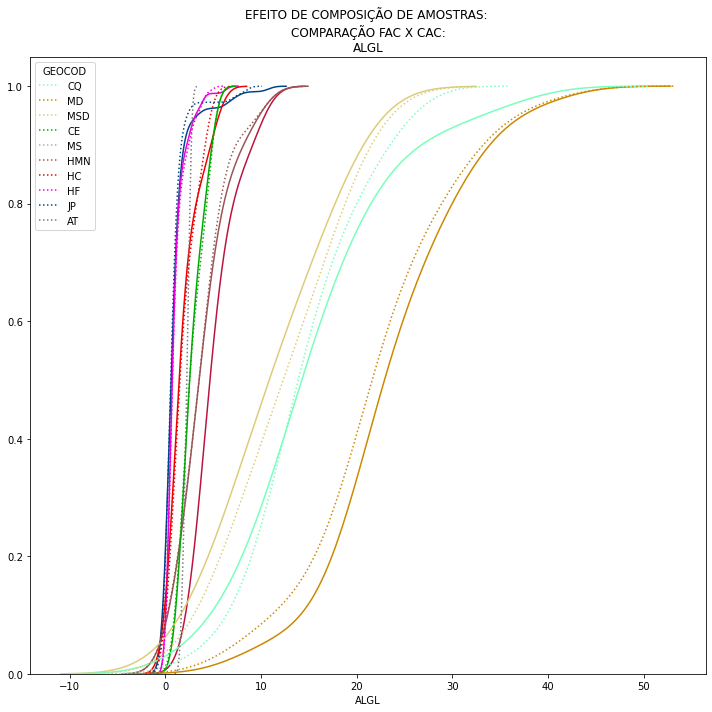

In [308]:
fig=plt.figure(figsize=chart_size)
grade='ALGL'

sea.kdeplot(data=fso, x=fso[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)


plt.tight_layout();

C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


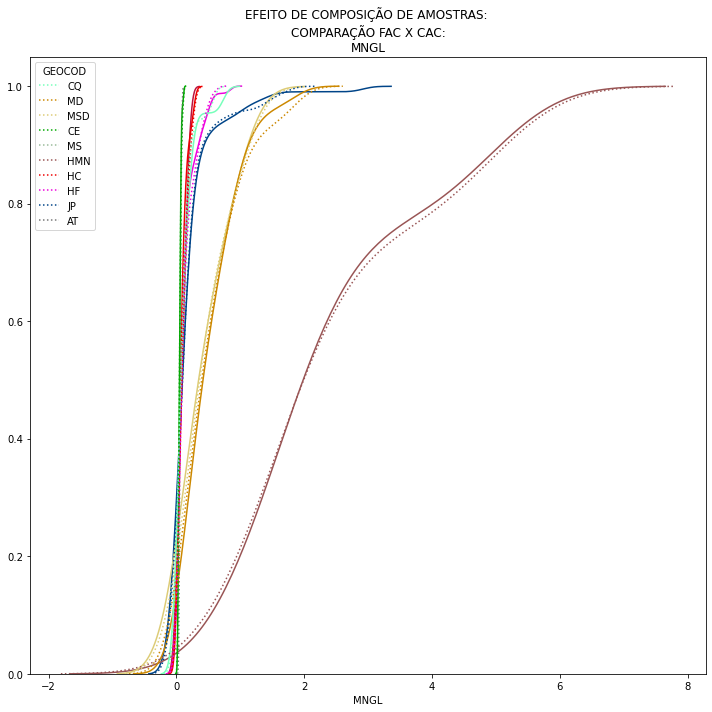

In [309]:
fig=plt.figure(figsize=chart_size)
grade='MNGL'

sea.kdeplot(data=fso, x=fso[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)


plt.tight_layout();

C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


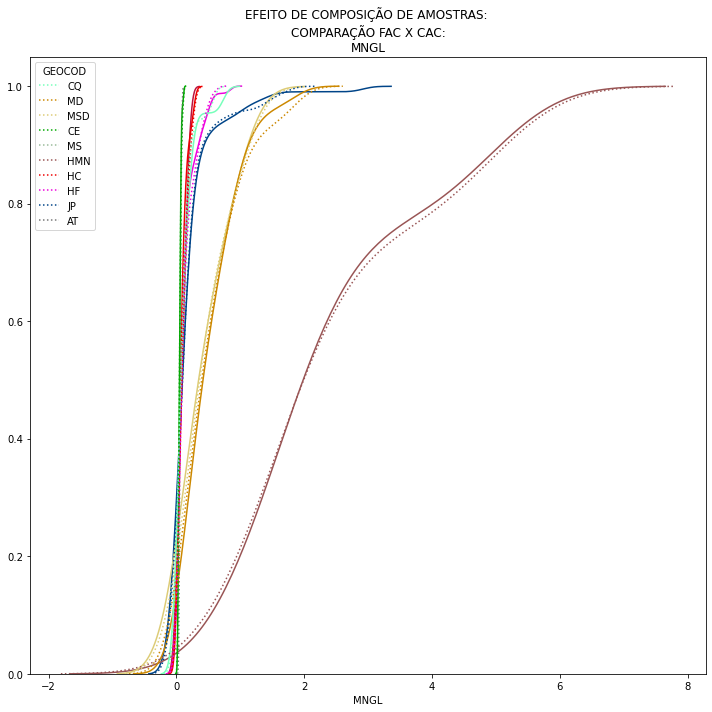

In [310]:
fig=plt.figure(figsize=chart_size)
grade='MNGL'

sea.kdeplot(data=fso, x=fso[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)


plt.tight_layout();

C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


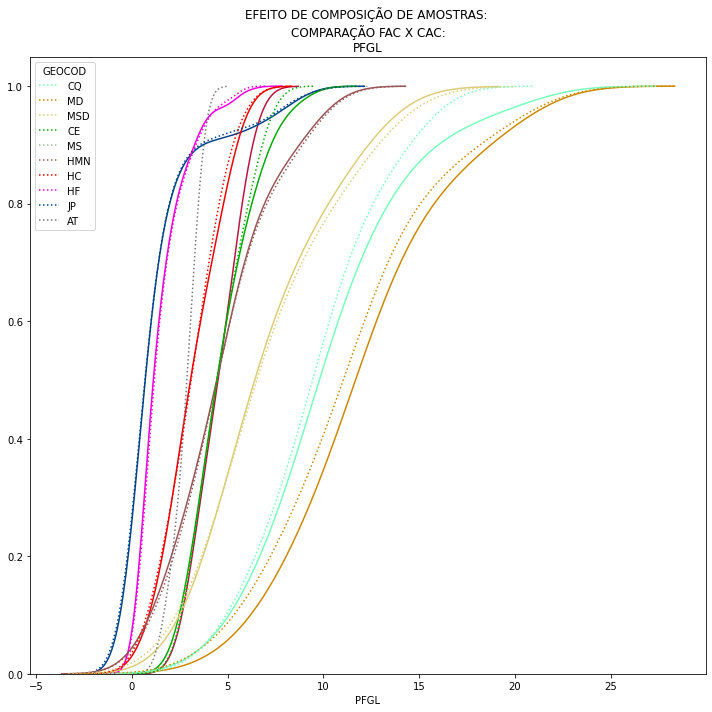

In [311]:
fig=plt.figure(figsize=chart_size)
grade='PFGL'

sea.kdeplot(data=fso, x=fso[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)


plt.tight_layout();

C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


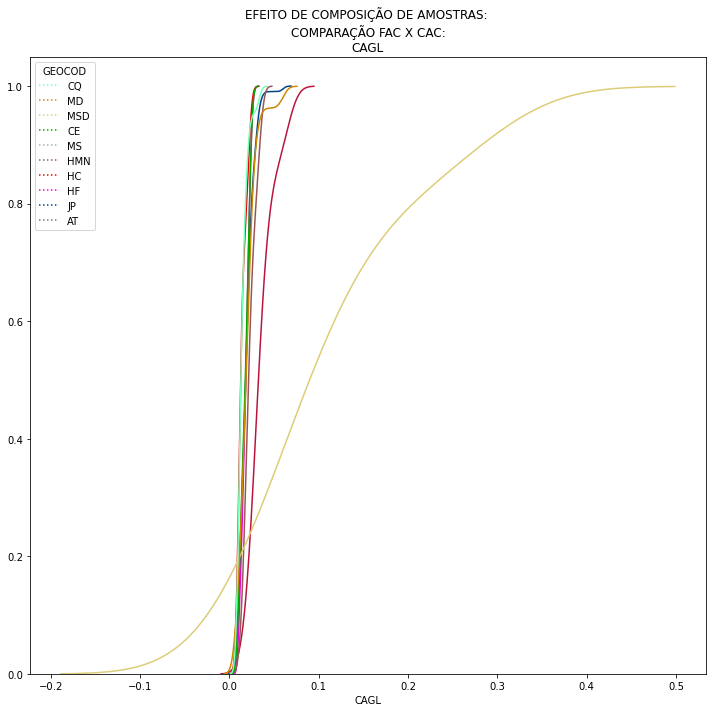

In [312]:
fig=plt.figure(figsize=chart_size)
grade='CAGL'

sea.kdeplot(data=fso, x=fso[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)


plt.tight_layout();

C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


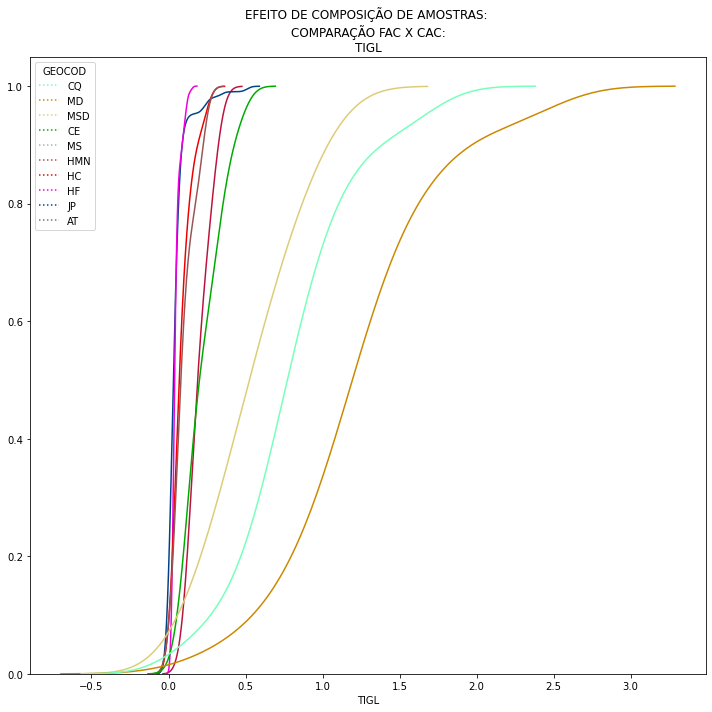

In [313]:
fig=plt.figure(figsize=chart_size)
grade='TIGL'

sea.kdeplot(data=fso, x=fso[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)


plt.tight_layout();

C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


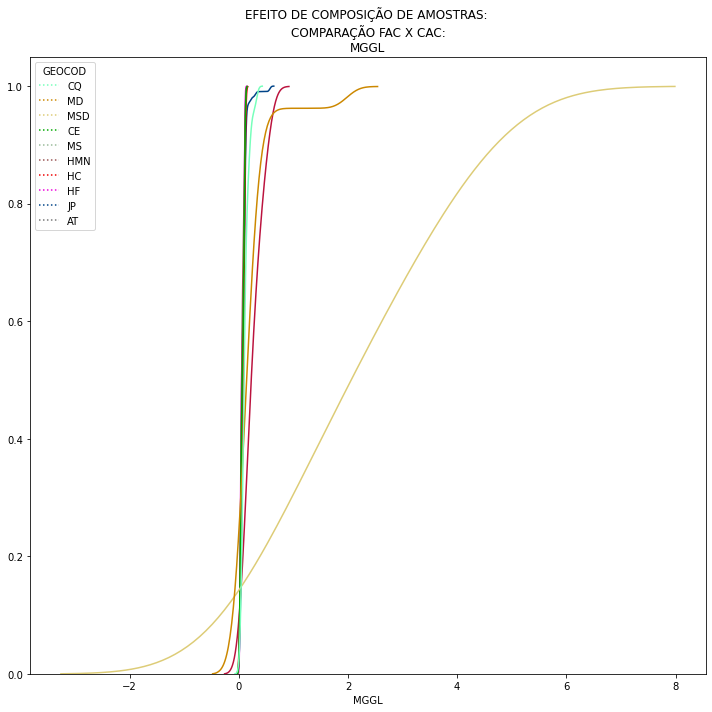

In [314]:
fig=plt.figure(figsize=chart_size)
grade='MGGL'

sea.kdeplot(data=fso, x=fso[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)


plt.tight_layout();

C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


KeyError: 'G1'

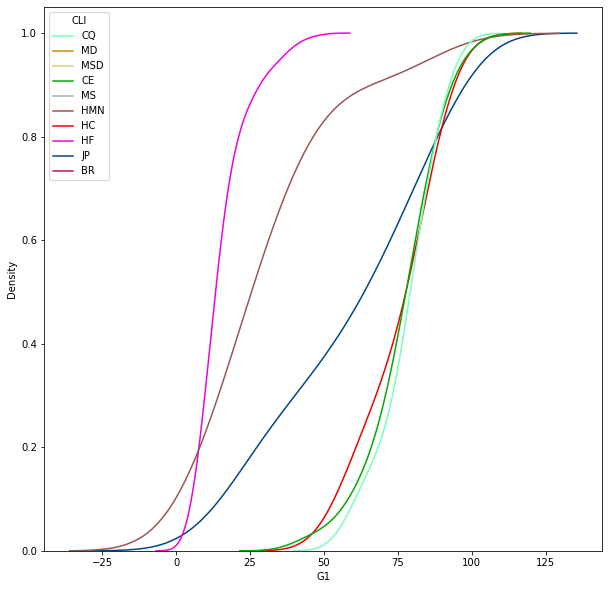

In [317]:
fig=plt.figure(figsize=chart_size)
grade='G1'

sea.kdeplot(data=fso, x=fso[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)


plt.tight_layout();

In [ ]:
fig=plt.figure(figsize=chart_size)
grade='G2'

sea.kdeplot(data=fso, x=fso[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)


plt.tight_layout();

In [ ]:
fig=plt.figure(figsize=chart_size)
grade='G3'

sea.kdeplot(data=fso, x=fso[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)


plt.tight_layout();

C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


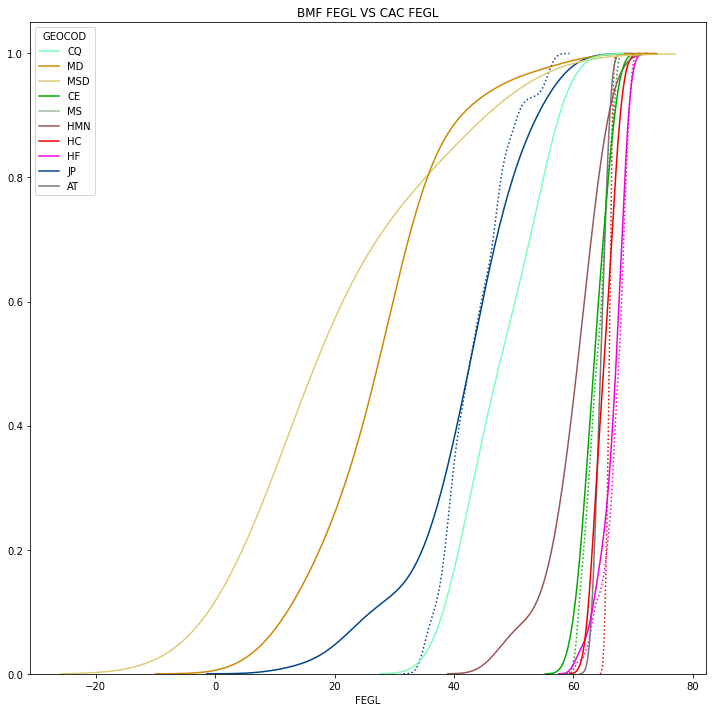

In [318]:
fig=plt.figure(figsize=chart_size)

sea.kdeplot(data=bmf, x=bmf.FEGL, hue='LITO',  cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")
sea.kdeplot(data=cac, x=cac.FEGL, hue='GEOCOD',  cumulative=True, common_norm=False, palette=litocolor)
plt.title('BMF FEGL VS CAC FEGL')
plt.xlabel('FEGL')
plt.ylabel('')

plt.tight_layout();